<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Machine Learning - 1</center></h1>

<b><h2><center>Booking cancellations</center></h2></b>

# Problem Statement

###**Context**
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.


###**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

###**Data Description**

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

###**Data Dictionary:**

Booking_ID: the unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

Not Selected – No meal plan selected

Meal Plan 1 – Breakfast

Meal Plan 2 – Half board (breakfast and one other meal)

Meal Plan 3 – Full board (breakfast, lunch, and dinner)

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

###**EDA Questions**

1. What are the busiest months in the hotel?

2. Which market segment do most of the guests come from?

3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these 7. requirements affect booking cancellation?

#Importing neccessary libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)

#Loading the dataset

In [ ]:
df=pd.read_csv('/content/INNHotelsGroup.csv')

In [ ]:
data=df.copy()

#Overview of the data

In [ ]:
#viewing first 5 rows
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

* These above are top 5 rows.
* There are 19 columns in the dataset.
*Booking id has unique values.


In [ ]:
#viewing last 5 rows
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

*  These above are bottom 5 rows.
*  There are 19 columns some have to be encoded

In [ ]:
#Statistical summary of the data
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

* There are 14 numeric columns.
* In number of children column 25%, 50% and 75% showed as 0 but the max has 10, it should be cross checked once before predicting model on the dataset.
* NO of previous bookings not canceled has similarity as the number of children column does.

In [ ]:
#Checking the data types of the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

*  There are : 13 int columns , 5 object type of columns and 1 float
* Booking id , type of meal plan, room type reserved, market segment type, and booking status columns has object type which is valid.


In [ ]:
#checking the null values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There is no null values present in the dataset.

In [ ]:
#Checking shape of the data
data.shape

(36275, 19)

* In the dataset there are 19 columns and 36275 rows.

In [ ]:
#checking for duplicates in the dataset
data.duplicated().sum()

0

* There are no duplicate values in the dataset.

#Exploratory data analysis

##Visualizing the relationships

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

###Univariate Analysis

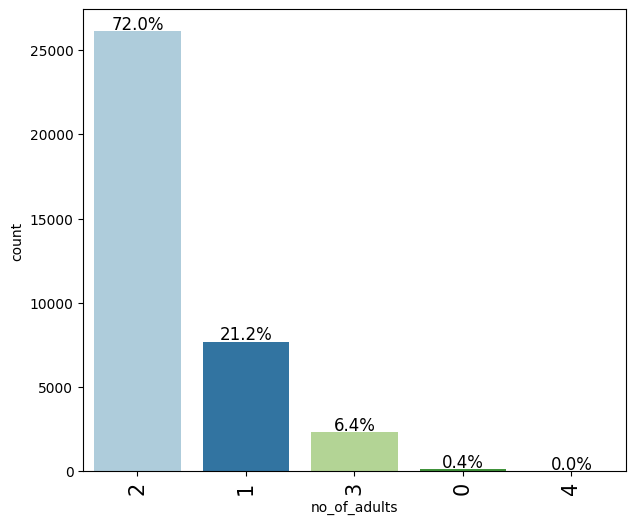

In [ ]:
labeled_barplot(data, "no_of_adults", perc=True)

* As per above plot only 2 adults frequently visit hotels,the percentage of visiting only 2 adults is 72%.
* secondly a single adult often visit to the hotel,one adult vising percentage is 21.2%.

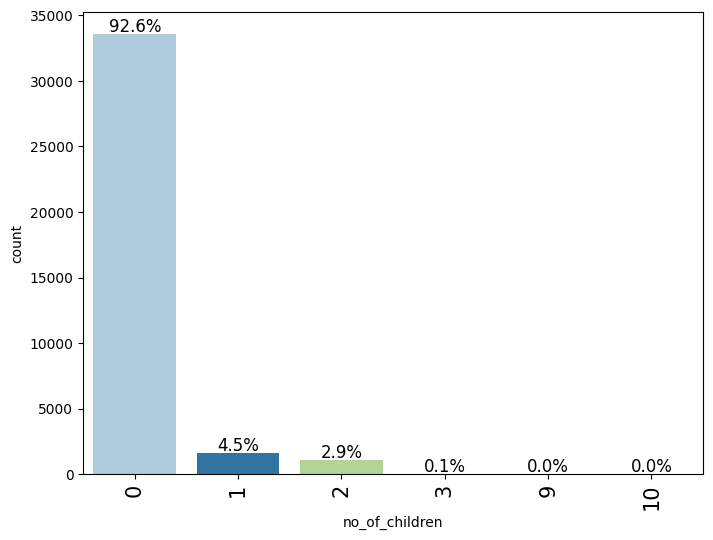

In [ ]:
labeled_barplot(data, "no_of_children", perc=True)

* According to the above plot children are not used to visit hotel often, 92.6% of people of visit hotel are not children.
* Only a single child visiting to hotel is 4.5% which is higher than 2, 3, 9 or 10

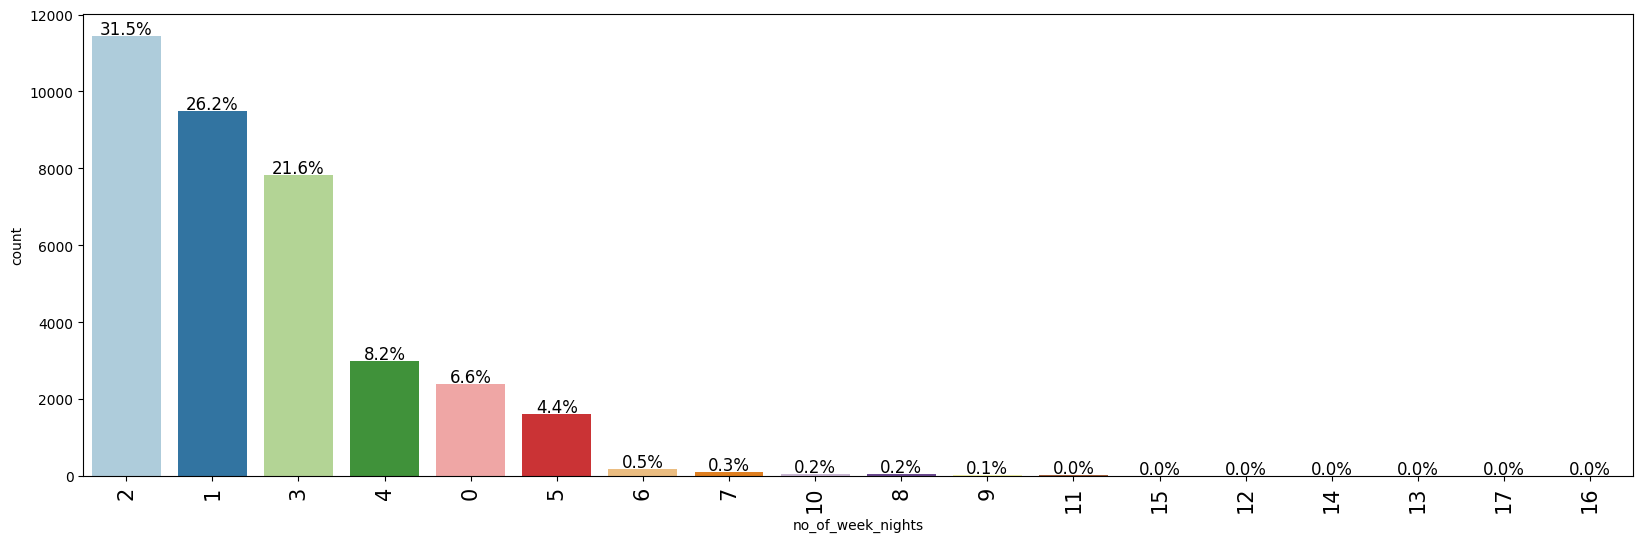

In [ ]:
labeled_barplot(data, "no_of_week_nights", perc=True)

*  Most number of weeks preferable to the visitors is 2, 31.5% of the visitors stays for 2 days in the week.
* second highest is 1 day ,staying for a day is preferable for 26.2%.
* Staying for 3 day is 21.6%.

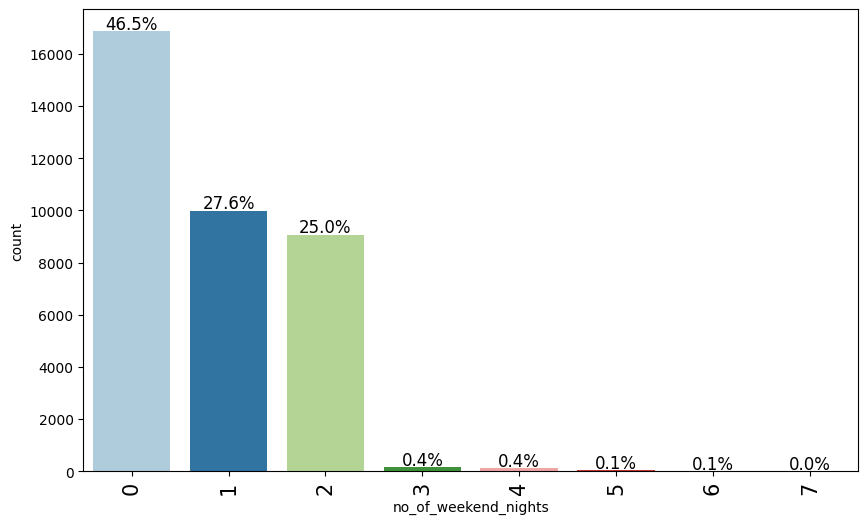

In [ ]:
labeled_barplot(data, "no_of_weekend_nights", perc=True)

* 46.5% of the time visitors like to stay at week nights instead of weekend nights.
* 27.6% of the times visitors like to stay for a day in weekend nights.
* 2 weekend nights are preferable for 25% of the times.

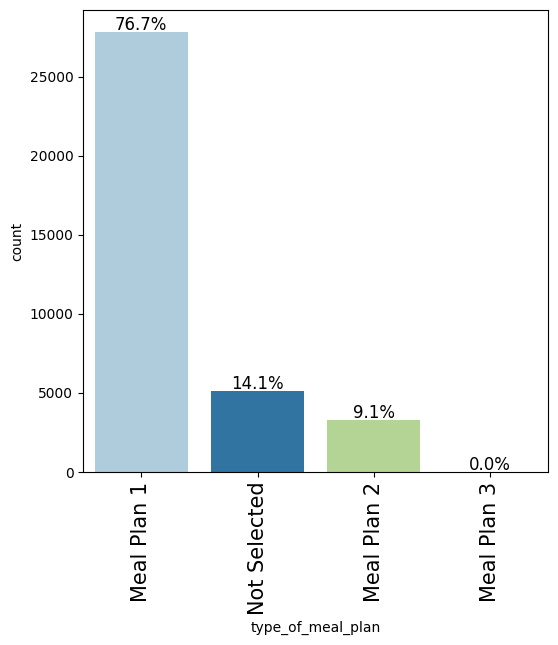

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True)

* 76.6% of the time meal plan 1 is most preferable.
* 14.1% of the people has no demand for specific type of food.
* Meal plan 2 is preferred by 9.1% of the visitors
* No one prefer meal plan 3.

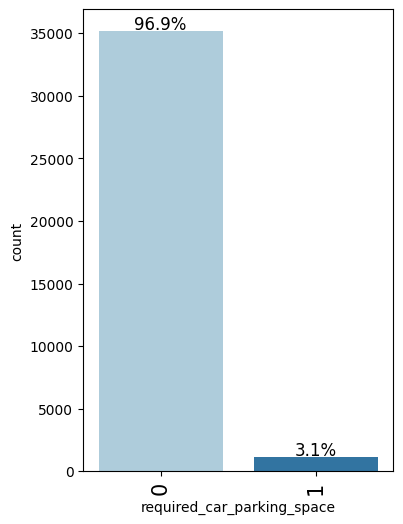

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* 96.9% of the visitors has no demand for the car parking space, which shows 96.9% of the visitors do not bring cars to the hotel.
* 3.1% of the visitors required car parking space.

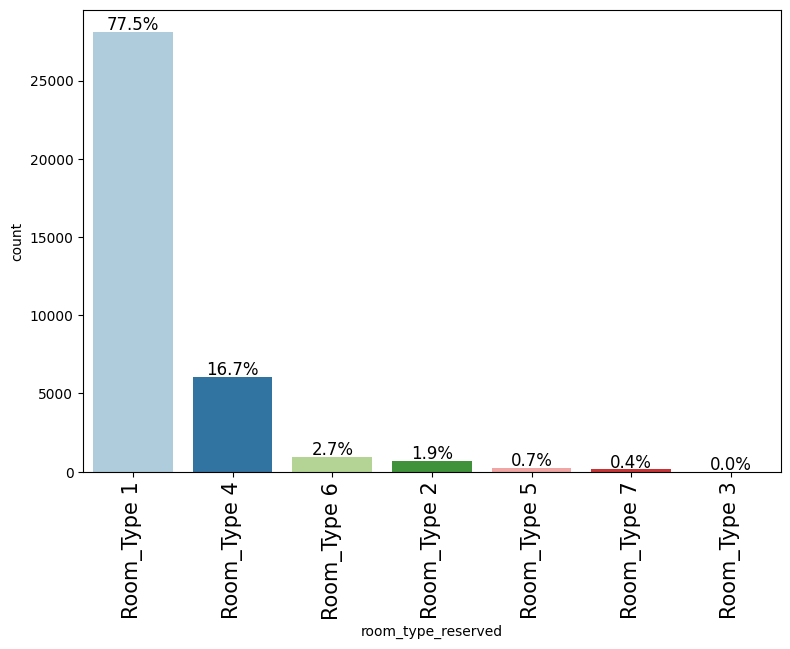

In [ ]:
labeled_barplot(data, "room_type_reserved", perc=True)

* Room type 1 is most preferable for the visitors, 77.5% of the visitors like room type 1 to stay.
* Room type 4 is second most preferable room to stay, 16.7% of the visitors has type 4 room.

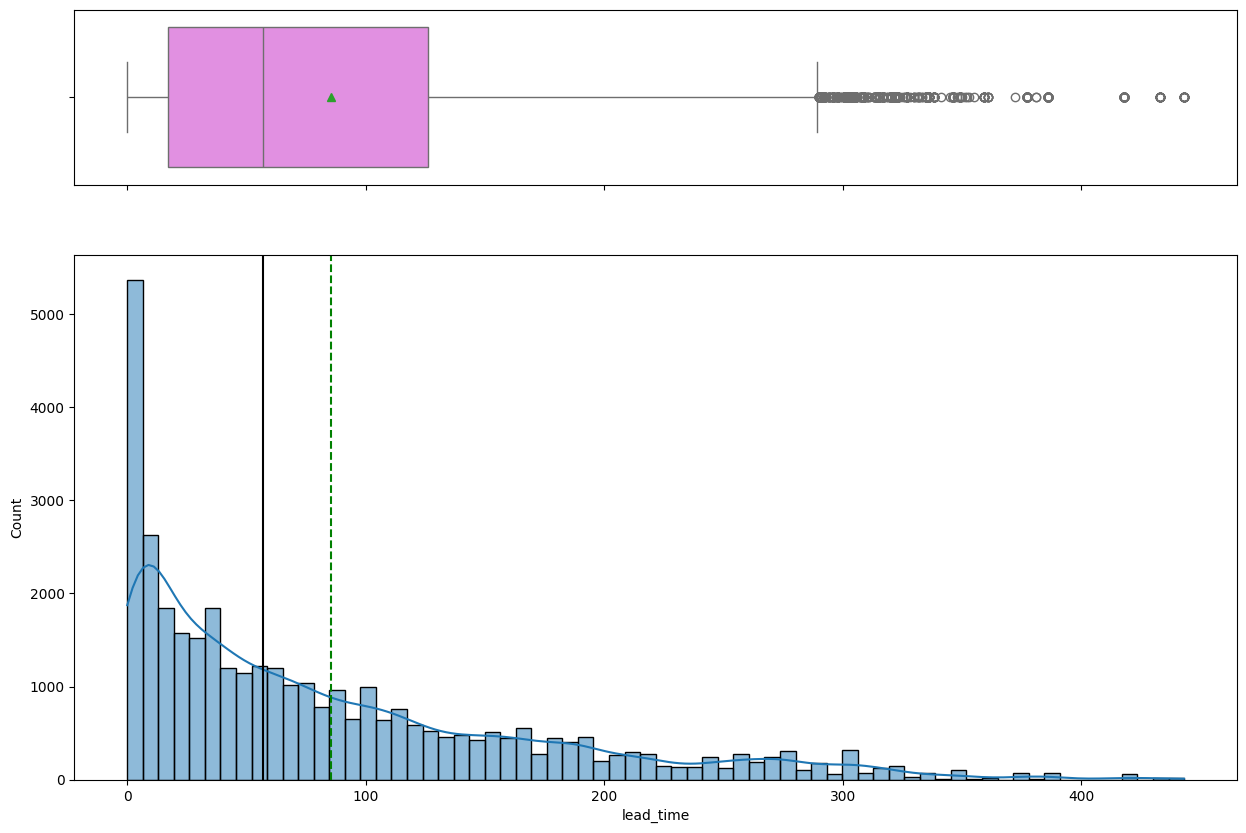

In [ ]:
histogram_boxplot(data,'lead_time',kde=True)

* Most the people dont have lead time, that means most of the visitors do not book their room early.
* Boxplot have outliers
* sometimes people used to book their room so early , that means visitors make their plan so early that they visit to hotel.

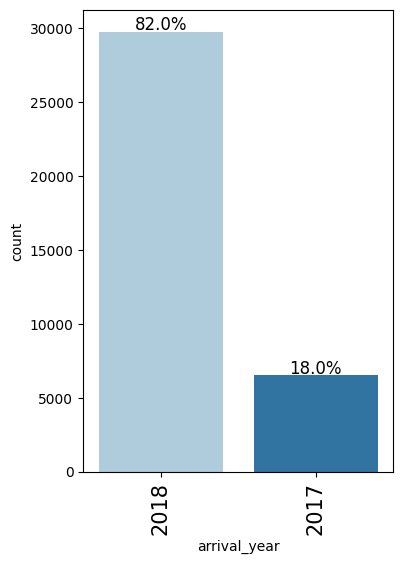

In [ ]:
labeled_barplot(data, "arrival_year", perc=True)

* 82% of the people had visited to hotel on 2018 than 2017.
* 18% of the people had visited to hotel on 2017.

###**1. What are the busiest months in the hotel?**

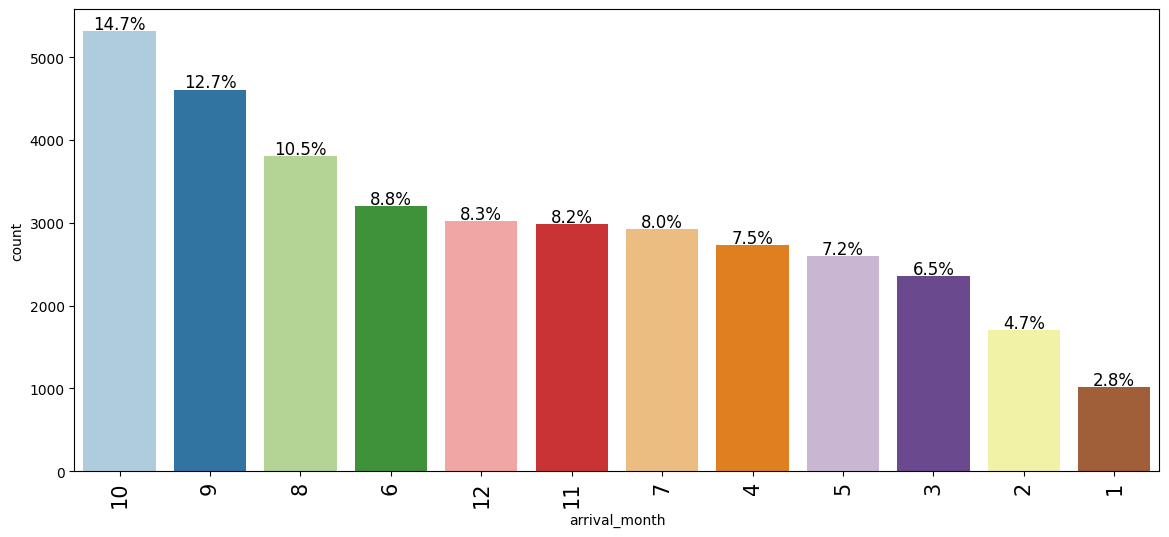

In [ ]:
labeled_barplot(data, "arrival_month", perc=True)

* During the month of october the visitors used to visit hotel more often, 14.7% of the visitors used to visit on october.
* 2nd most preferable month is september ,12.7% of the people visits hotel in this month.
* 3rd preferable month is august , where 10.5% of the people visits.
- **OCTOBER, SEPTEMBER, AUGUST ARE THE BUSIEST MONTHS IN THE HOTEL.**

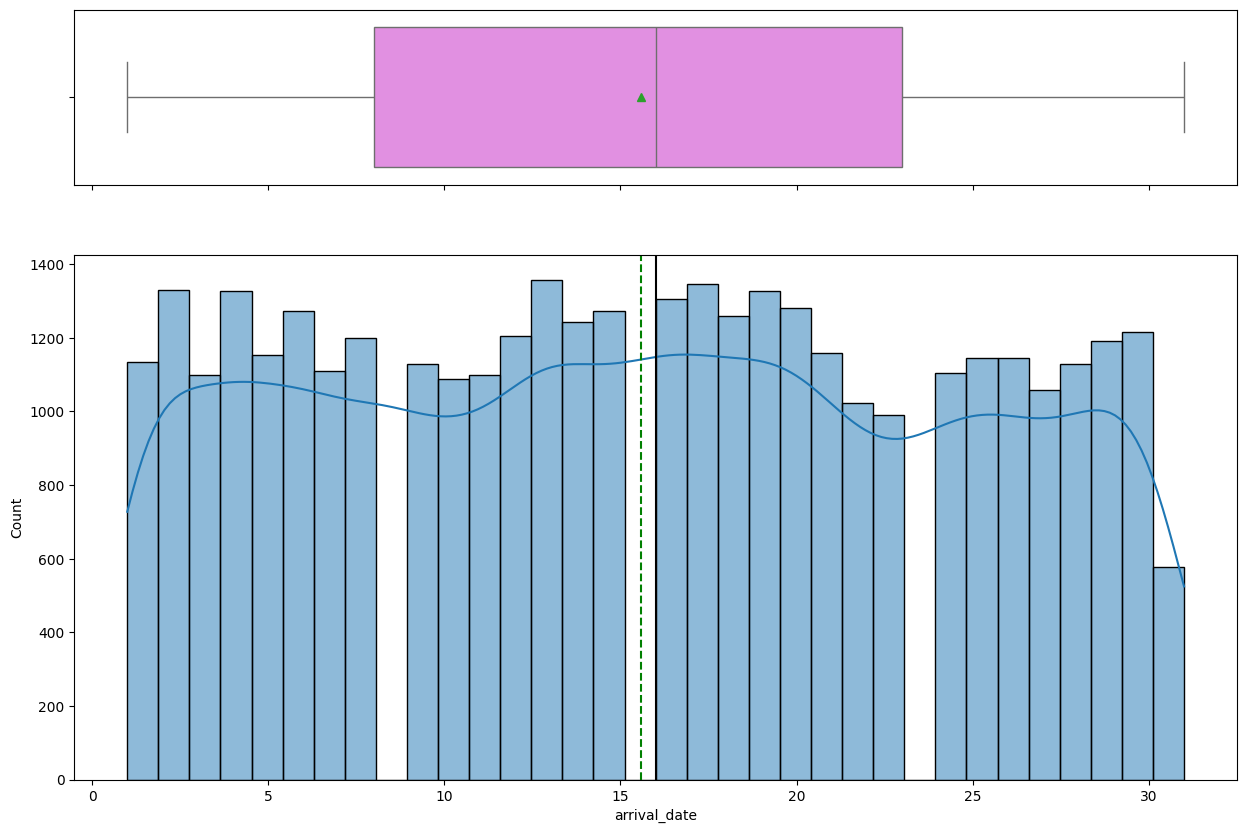

In [ ]:
histogram_boxplot(data,'arrival_date',kde=True)

* The data is spread out to each day except 31st.
* Which means there is no specific day to visit the hotel.
* Median is 15 and there is no outlier present.

###**2. Which market segment do most of the guests come from?**

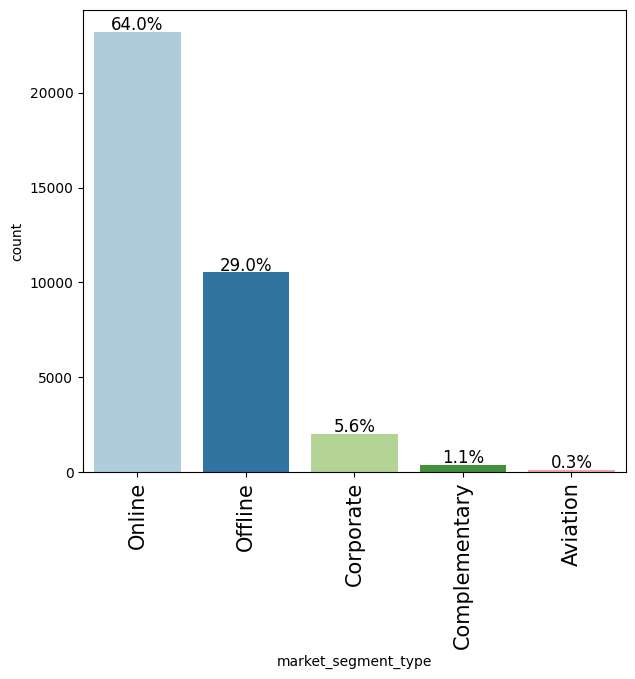

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

* Most used market segment is online , 64% of marketing is done through the online.
* Offline is second more preferable market segment type, 29% of marketing is done.
* 3rd most important one is corporate which is of 5.6%.
-**ONLINE IS THE MARKET SEGMENT DO MOST OF THE GUESTS COME FROM.**

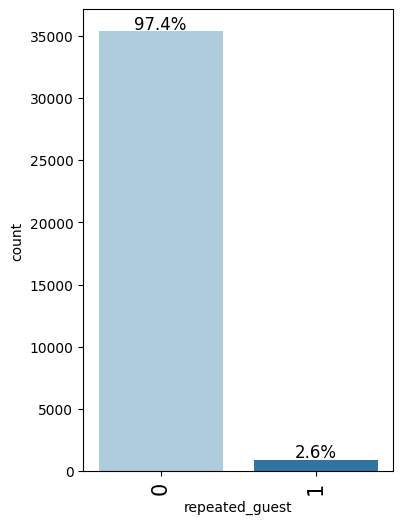

In [ ]:
labeled_barplot(data, "repeated_guest", perc=True)

* 97.4% of the visitors are not repeated guests.
* Only 2.6% of the visitors are repeated guests.

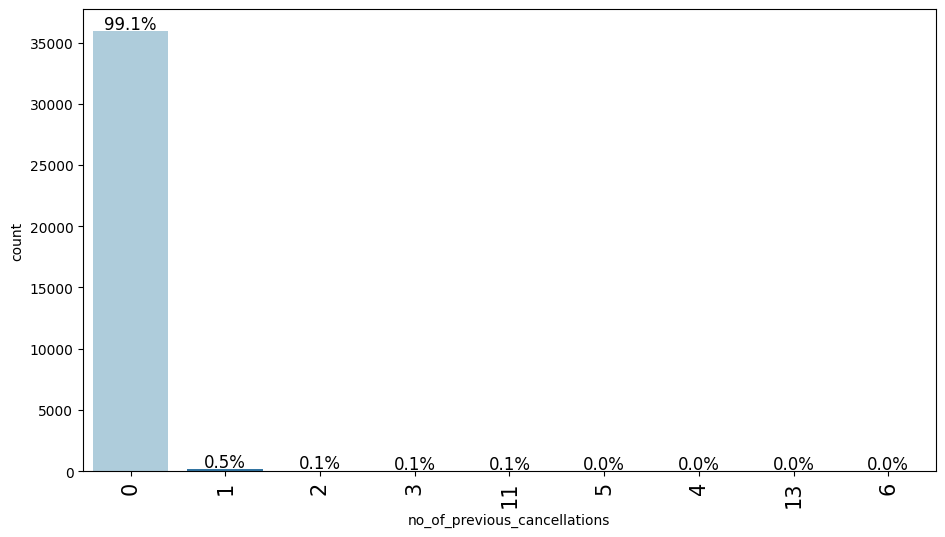

In [ ]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

* 99.1% of the times booking is not cancelled.
* 0.5% of the times booking is cancelled.

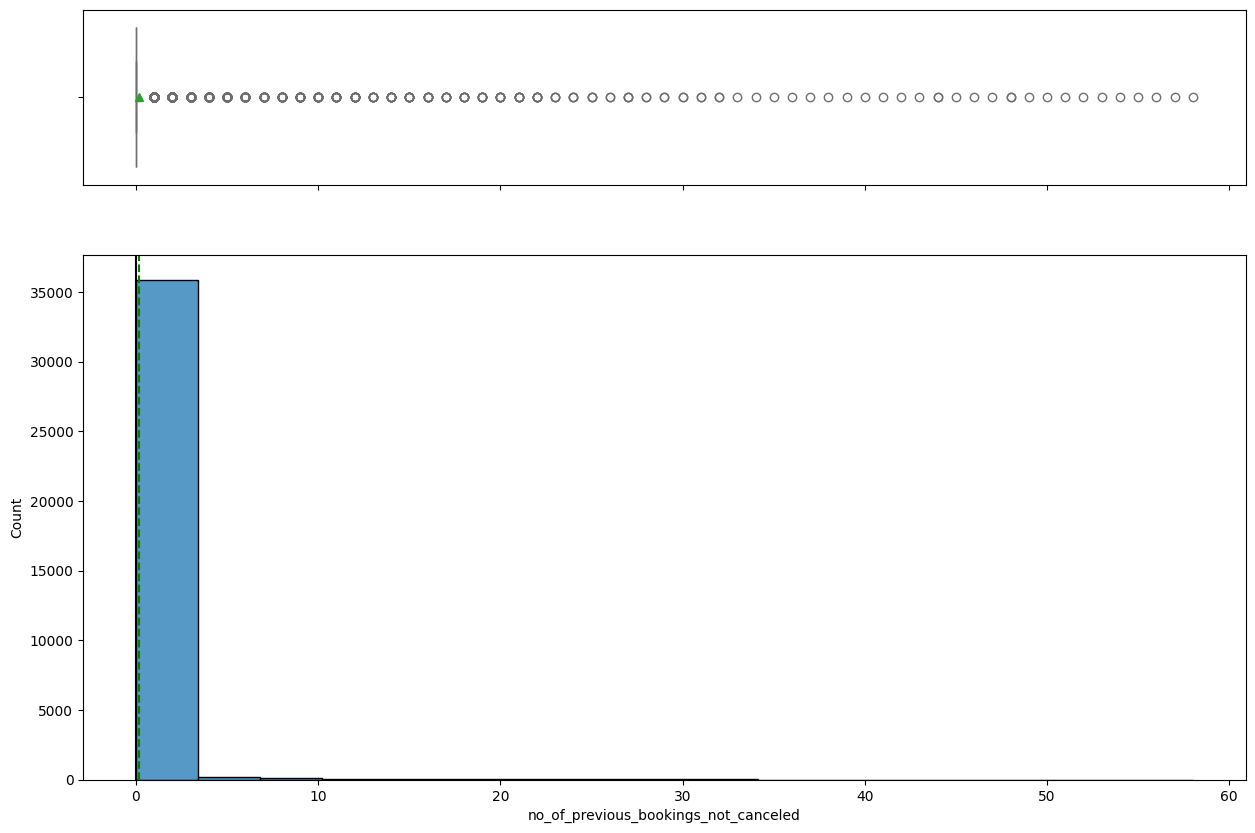

In [ ]:
histogram_boxplot(data,'no_of_previous_bookings_not_canceled')

* There are lots of outliers.
* Mean, median are on 0.

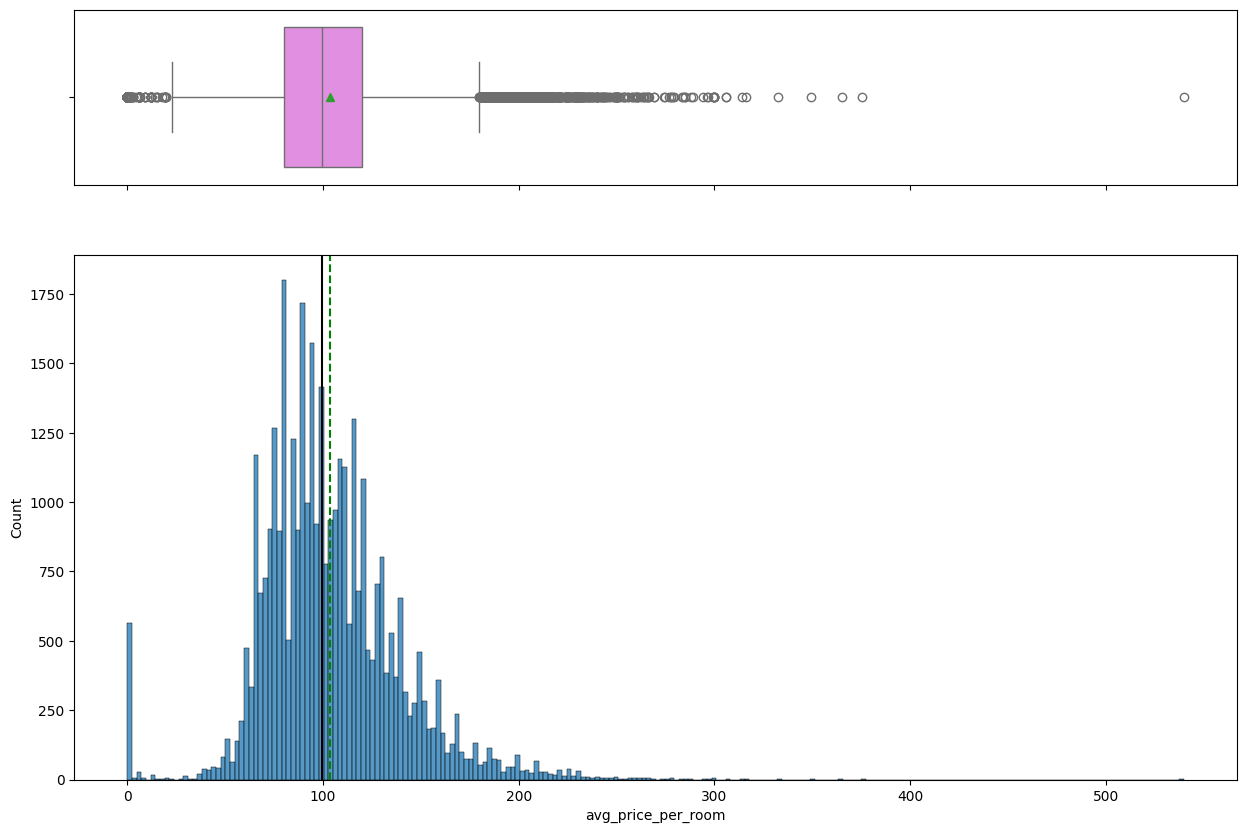

In [ ]:
histogram_boxplot(data,'avg_price_per_room')

* Most of the hotel rooms booked is around 100 euros
* The mean and median is also around 100 euros.
* There are lots of outliers present.

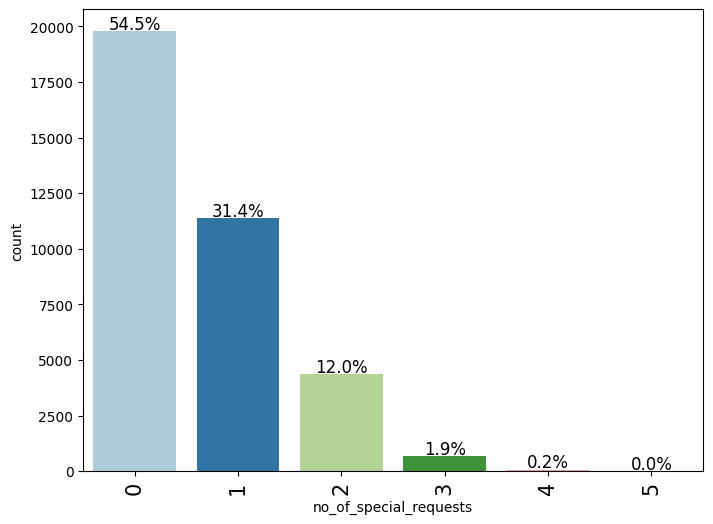

In [ ]:
labeled_barplot(data, "no_of_special_requests", perc=True)

* 54.5% of the people has no special request.
* 31.4% of the people has only a special request.
* 12% of the people has 2 special request.

### **4.What percentage of bookings are canceled?**

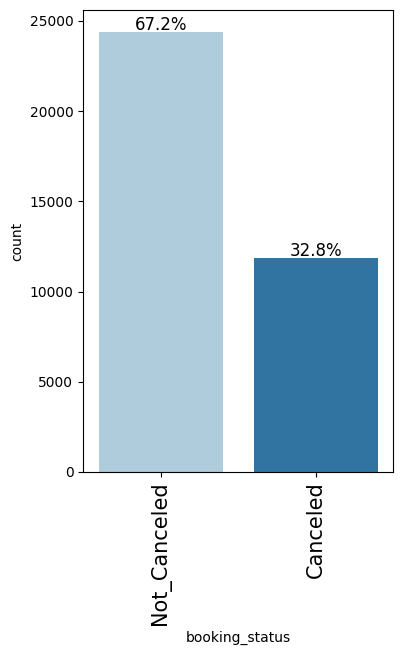

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

* 67.2% of booking is not cancelled
* 32.8% of booking is cancelled which has to predict using given variables.

###**Bivariate analysis**

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


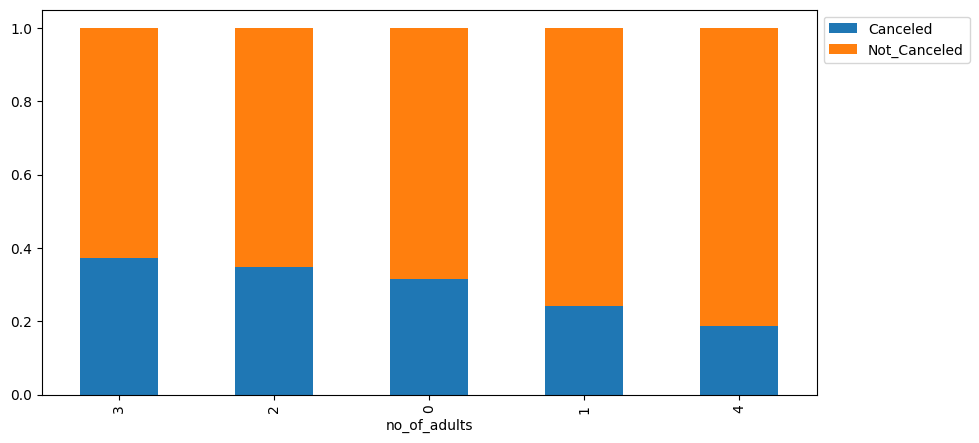

In [ ]:
stacked_barplot(data, "no_of_adults", "booking_status")

* When 4 adults are decided to travel, cancellation is less.
* Most of the cancelation is done when a room is booked for 3 adults.
* 2nd most cancelation is done when room is booked for 2 adults only.

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


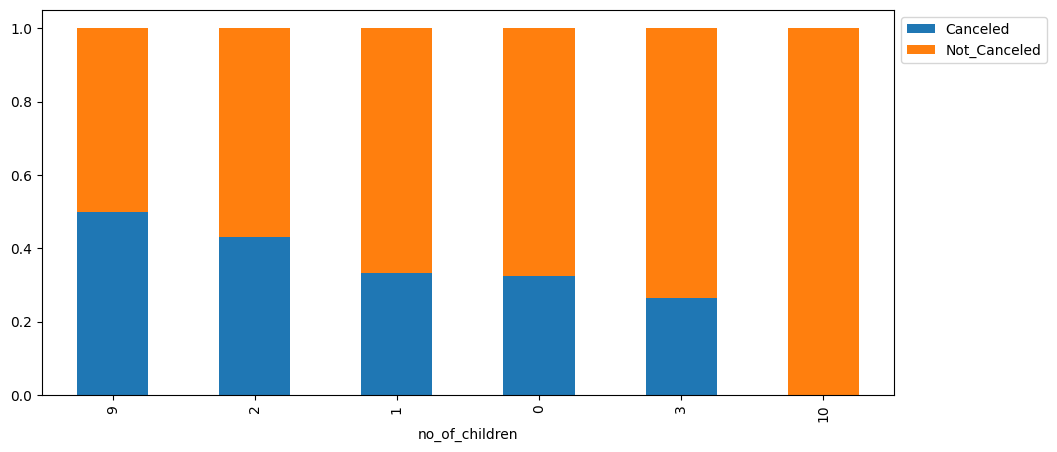

In [ ]:
stacked_barplot(data, "no_of_children", "booking_status")

* When 10 children has booked room there no cancelation.
* when 9 children are decided to book room, there is 50% chances of cancelation.
* 2nd highest cancelation occured when 2 children are decided to book a room.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


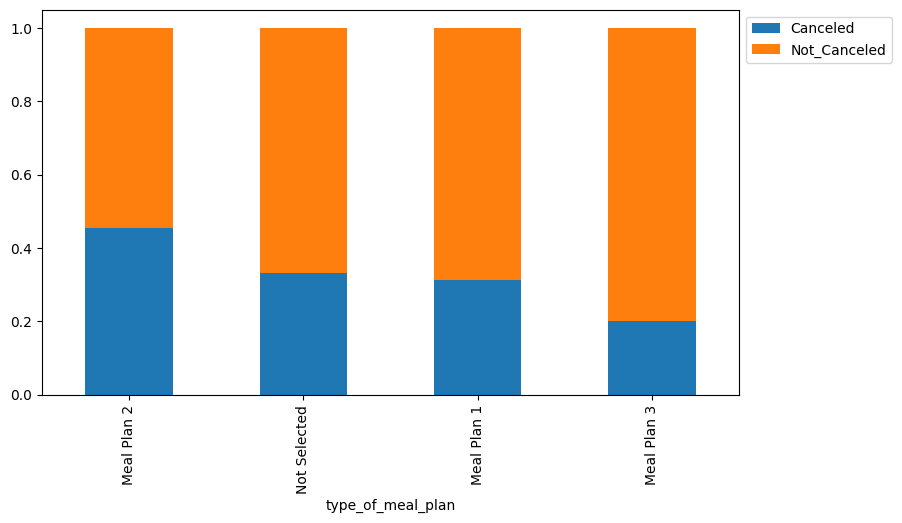

In [ ]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

* Meal plan 2 has highest cancelation.
* Not selected type of meal plan has tend to cancelation.

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


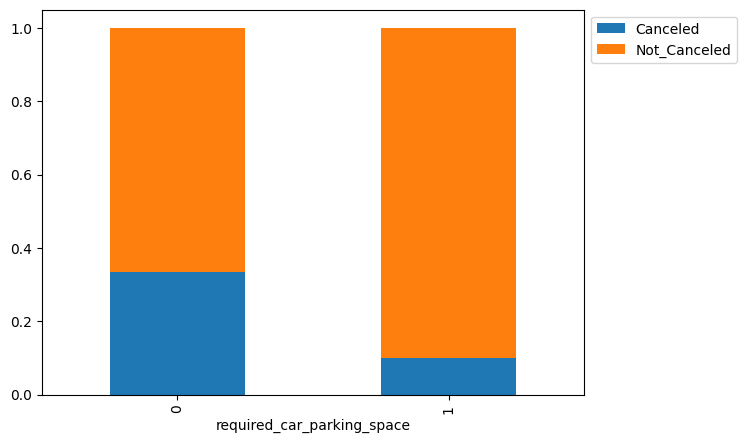

In [ ]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

* Those visitors who do not required parking space are tend to cancel the booking.
* The cancelation is less when visitor demand to have a parking space than who dont demand.

booking_status  Canceled  Not_Canceled    All
arrival_date                                 
All                11885         24390  36275
15                   538           735   1273
4                    474           853   1327
16                   473           833   1306
30                   465           751   1216
1                    465           668   1133
12                   460           744   1204
17                   448           897   1345
6                    444           829   1273
26                   425           721   1146
19                   413           914   1327
20                   413           868   1281
13                   408           950   1358
28                   405           724   1129
3                    403           695   1098
25                   395           751   1146
21                   376           782   1158
24                   372           731   1103
18                   366           894   1260
7                    364          

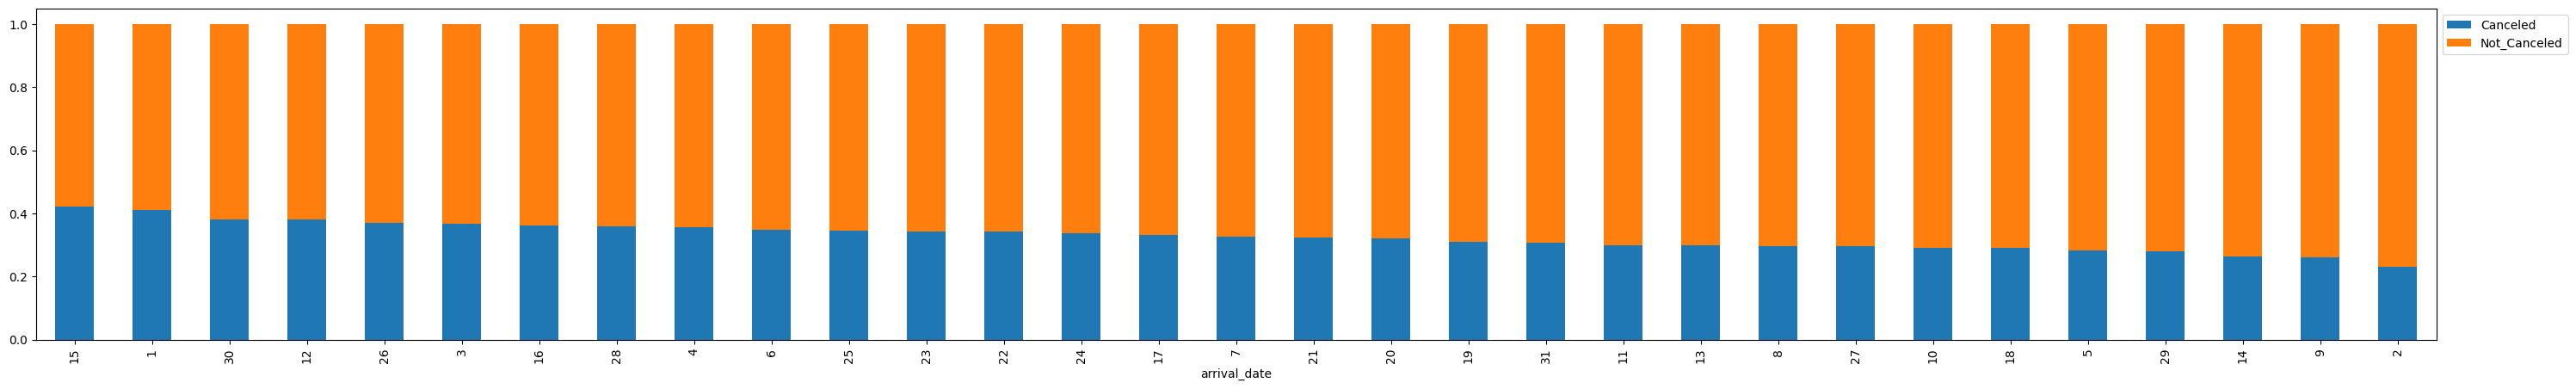

In [ ]:
stacked_barplot(data, "arrival_date", "booking_status")

* cancelation is evenly spread for each day so its difficult to predict cancelation using arrival date.

In [ ]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


* In 13 ,100% cancelation is done.
* In 11 , 100% not cancelled is done.

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

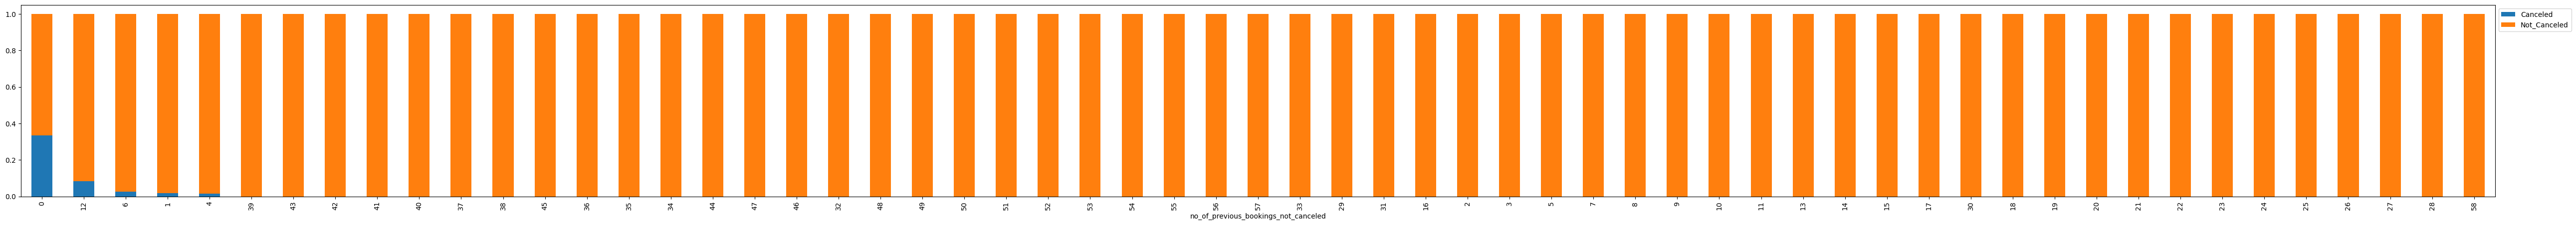

In [ ]:
stacked_barplot(data, "no_of_previous_bookings_not_canceled", "booking_status")

###6. **Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


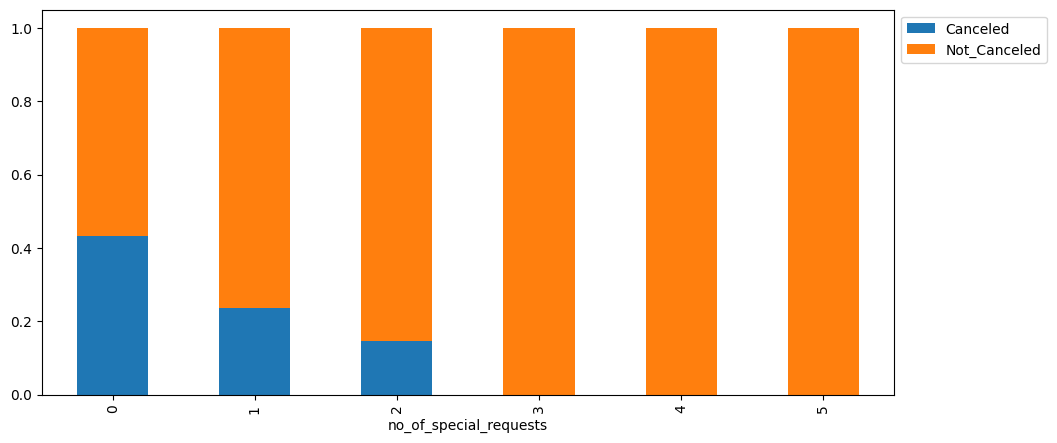

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* Those who dont have any special request are tend to cancel the booking.
* As the special request increases number of cancelation decreases.
* As said above when special request increased to 1 and then increased to 2 cancelation rate decreased.


###**5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


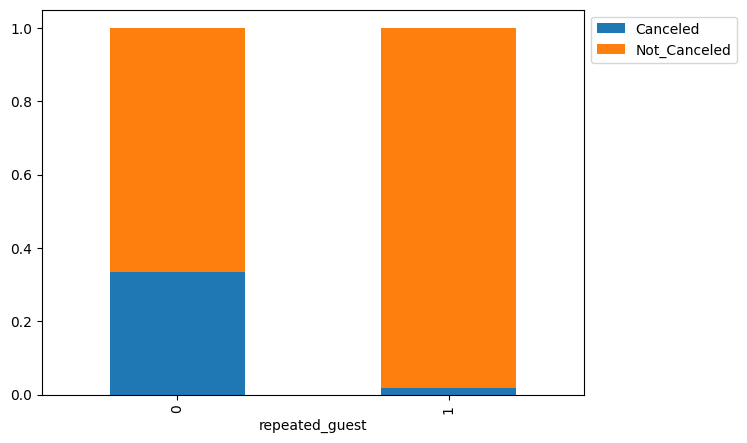

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status")

* Those who are not repeated customers tend to cancel the booking.
* Those who are repeated customers are not tend to cancel the booking.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


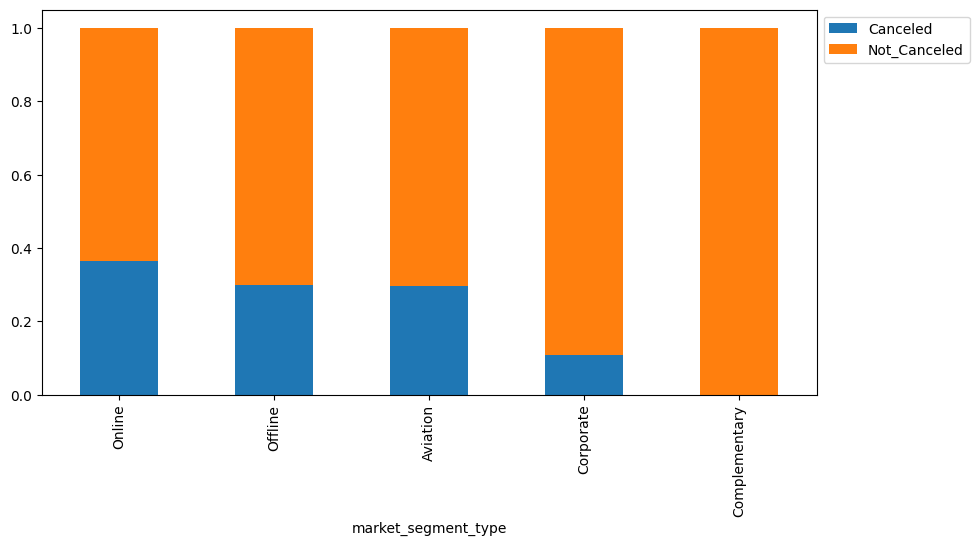

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

* When customers are come from complementary , the cancelation rate is null.
* When customers are came from corporate, the cancelation rate is lil more.
* When customers are came from aviation, the cancelation is lil more than corporate.
* But most of the cancelation is done when the customers are from online segment.
* 2nd most cancelation is done when the customers are from offline

###**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

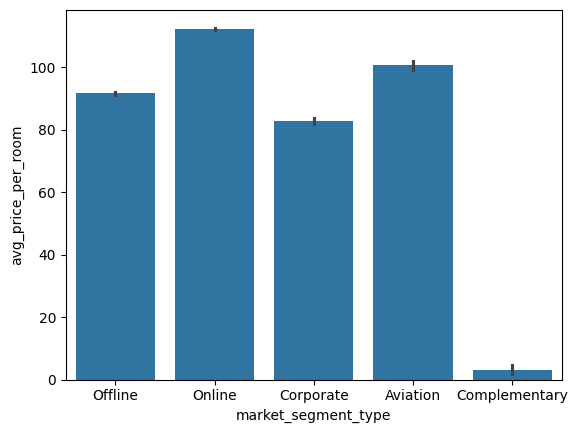

In [ ]:
sns.barplot(data=data,x='market_segment_type',y='avg_price_per_room')
plt.show()

* From the above graph we can understand that the highest price per room is in online market segment type.
* The lowest price per room is in complementary market segment type.
* Aviation has second highest priced market segment.
* Offline has lil more price than corporate market segment.

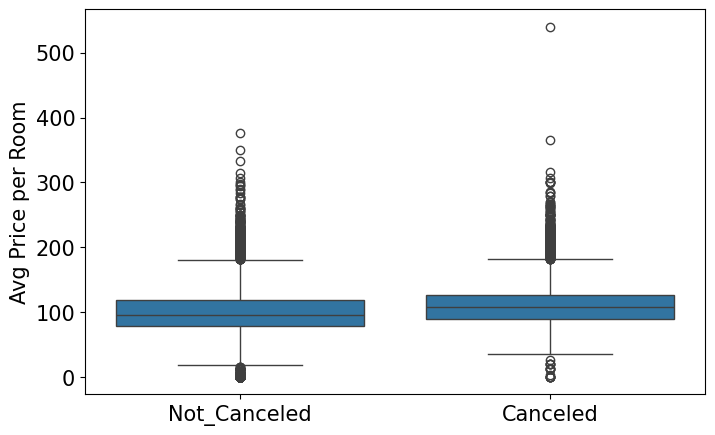

In [ ]:
# visualizing the relationship between avg room price and booking cancellation
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="booking_status", y="avg_price_per_room")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.ylabel('Avg Price per Room', fontsize=15);

* The cancellation of bookings does not seem to depend on price of the room

**Analysing the relationship between lead_time and booking_status**

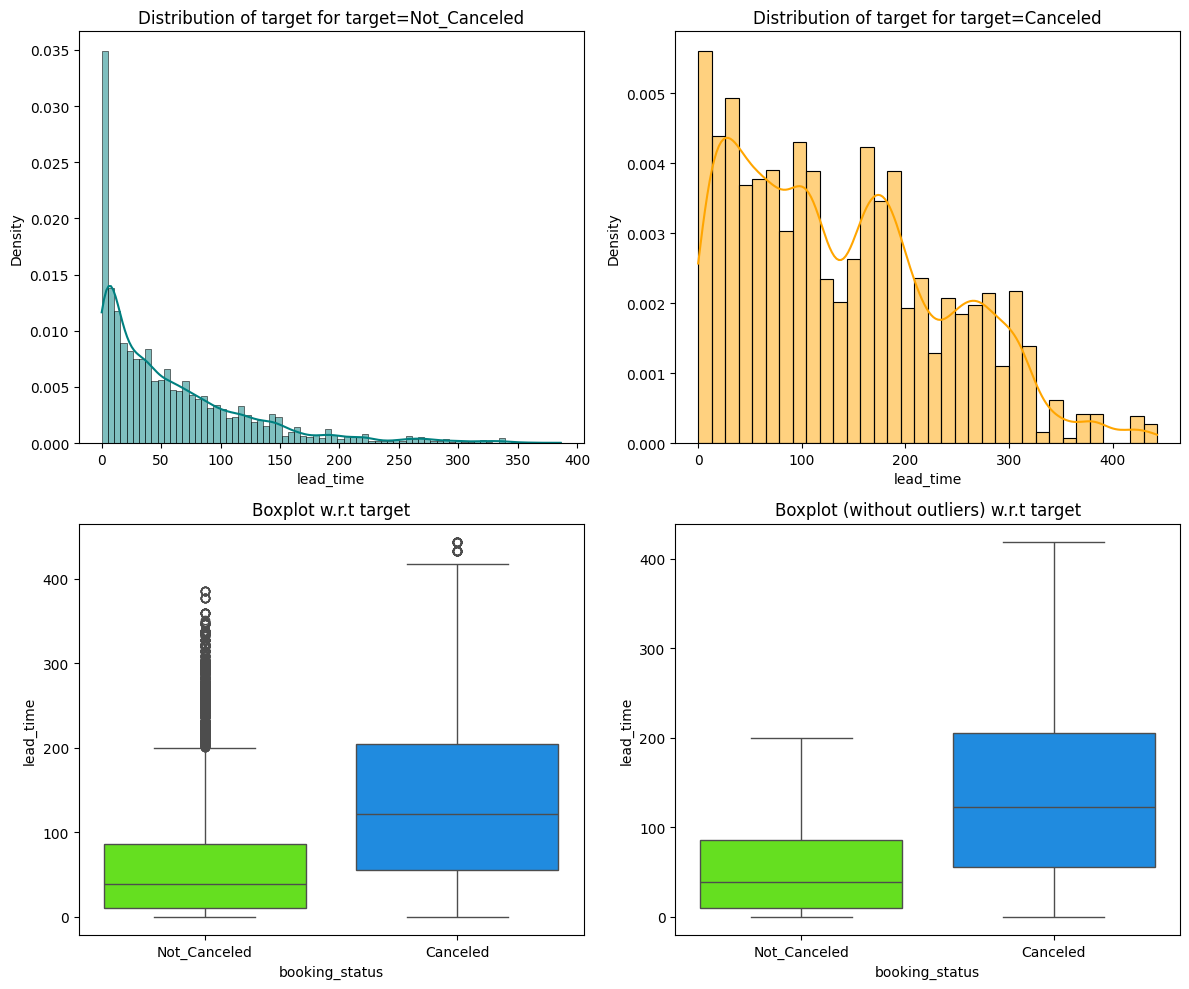

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* As said earlier many times the visitors visit without booking a hotel.
* There are outliers in the right side which should be treated.

**Analysing the relationship between avg_price_per_room and booking_status**

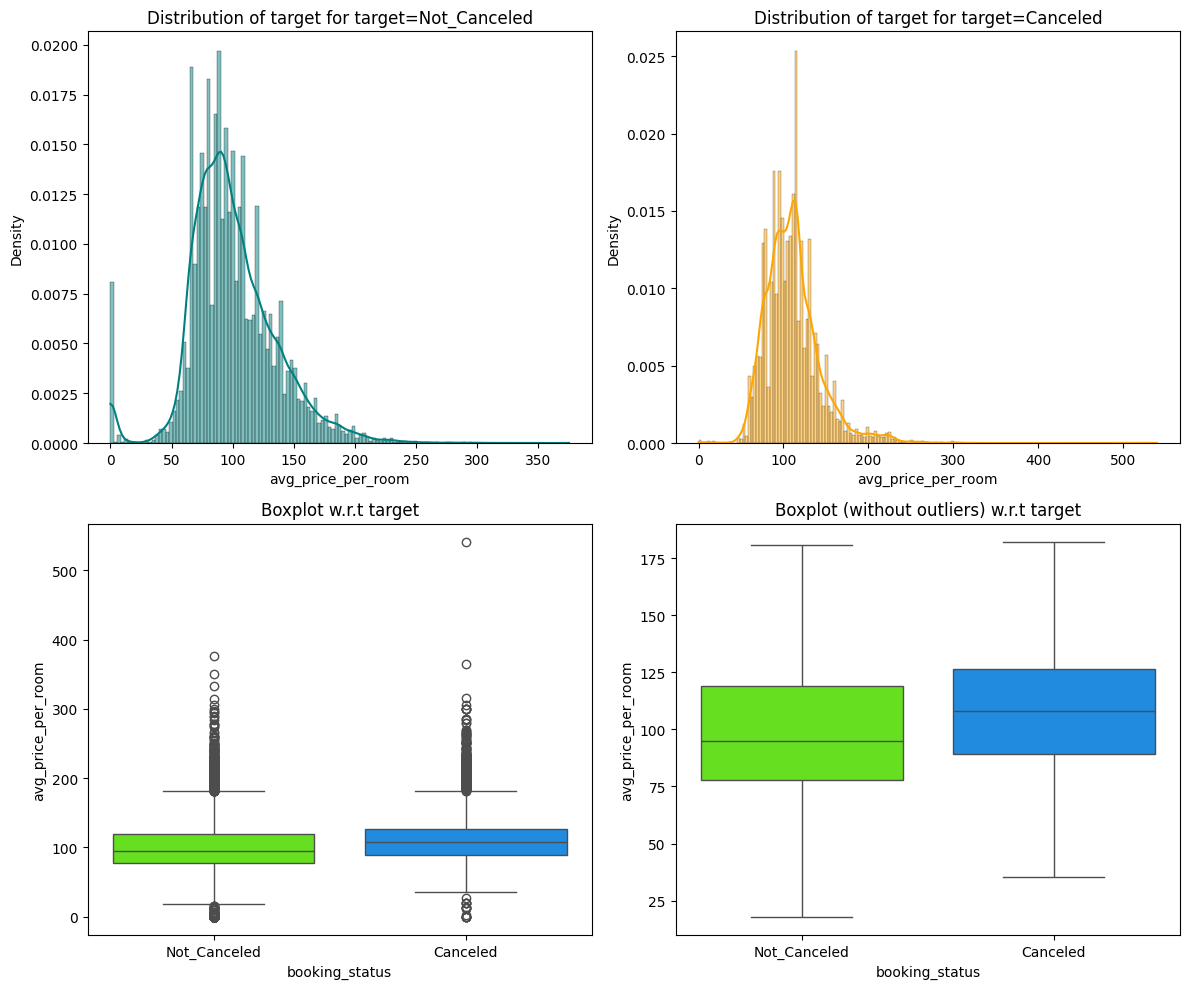

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The price of hotel room cant be 0 euros that means there is a problem with the data which should be treated.

In [ ]:
# checking the correlation between the features using heatmap
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The highest correlation is between no of previous bookings not canceled and the repeated customers which make sense too.
* There is lil less correlation between no of previous bookings canceled and repeated customers than the no of previous bookings not canceled and the repeated customers which is a good thing , which means people who visits hotel would like to stay in hotel.
* There is a correlation between no of previous bookings not canceled and no of previous bookings canceled.
* There is slightly high correlation between between avg price per room and no of children as compared to avg price per room and no of adults.
There is negative correlation between lead time and repeated customers.

In [ ]:
# checking the data
sns.set_style("darkgrid")
data.hist(figsize=(15,10))
plt.show()

## Feature engineering

In [ ]:
# replacing the zeros in avg price per room into nan
data['avg_price_per_room'].replace(0,np.nan,inplace=True)

In [ ]:
#checking how many rows had zeros which are converted into nan now
data.isnull()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0           False         False           False                 False   
1           False         False           False                 False   
2           False         False           False                 False   
3           False         False           False                 False   
4           False         False           False                 False   
...           ...           ...             ...                   ...   
36270       False         False           False                 False   
36271       False         False           False                 False   
36272       False         False           False                 False   
36273       False         False           False                 False   
36274       False         False           False                 False   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                  False              False                       False   
1                  False              False                       False   
2                  False              False                       False   
3                  False              False                       False   
4                  False              False                       False   
...                  ...                ...                         ...   
36270              False              False                       False   
36271              False              False                       False   
36272              False              False                       False   
36273              False              False                       False   
36274              False              False                       False   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                   False      False         False          False   
1                   False      False         False          False   
2                   False      False         False          False   
3                   False      False         False          False   
4                   False      False         False          False   
...                   ...        ...           ...            ...   
36270               False      False         False          False   
36271               False      False         False          False   
36272               False      False         False          False   
36273               False      False         False          False   
36274               False      False         False          False   

       arrival_date  market_segment_type  repeated_guest  \
0             False                False           False   
1             False                False           False   
2             False                False           False   
3             False                False           False   
4             False                False           False   
...             ...                  ...             ...   
36270         False                False           False   
36271         False                False           False   
36272         False                False           False   
36273         False                False           False   
36274         False                False           False   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             False                                 False   
1                             False                                 False   
2                             False                                 False   
3                             False                                 False   
4                             False                                 False   
...                             ...                                   ...   
36270                         False                                 False   
36271                         False                            

In [ ]:
#filling missing values using mean of avg price per room
data['avg_price_per_room'].fillna(data['avg_price_per_room'].mean(),inplace=True)

#Data preprocessing

###Outliers detection and treatment

In [ ]:
# checking the outliers in the dataset
plt.figure(figsize=(15,12))
for i, variable in enumerate (cols_list):
  plt.subplot(4,4,i+1)
  plt.boxplot(data[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

**Observations**

* There are quite a few outliers in the data.
* However, we will treat some of them.
* And we not treat some as they are proper values genuine.
* Treating outliers which looks genuine will lead to loss in data.

In [ ]:
# creating a function to remove outliers of the column
def treat_outliers(df,cols):
  q1=df[cols].quantile(0.25)
  q3=df[cols].quantile(0.75)
  IQR=q3-q1
  lower_wisker=q1-1.5*IQR
  upper_wisker=q3+1.5*IQR
  df[cols]=np.clip(df[cols],lower_wisker,upper_wisker)
  return df

In [ ]:
#removing the outliers of the avg price per room
data=treat_outliers(data,'avg_price_per_room')
sns.boxplot(data=data,x='avg_price_per_room')
plt.show()

In [ ]:
#looking at the max lead time given in the dataset
data['lead_time'].max()

443

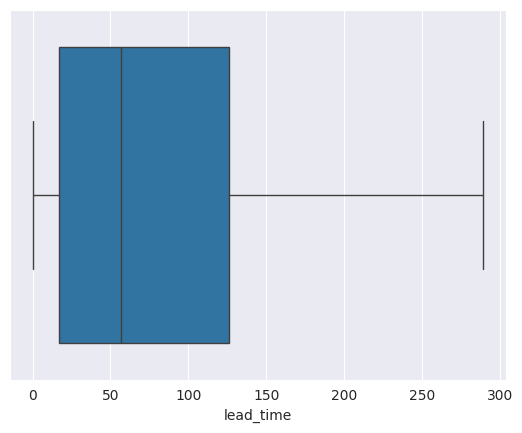

In [ ]:
# treating outliers of lead time
data=treat_outliers(data,'lead_time')
sns.boxplot(data=data,x='lead_time')
plt.show()

###Data preparation for modeling

* We want to predict which lead is more likely to cancelation of booking.
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# dropping unwanted columns of the given dataset
data.drop(["Booking_ID", "type_of_meal_plan","arrival_year","arrival_date"], axis=1, inplace=True)

In [ ]:
data['booking_status'].replace('Canceled',1,inplace=True)
data['booking_status'].replace('Not_Canceled',0,inplace=True)

In [ ]:
data['booking_status'].value_counts(1)

booking_status
0    0.672364
1    0.327636
Name: proportion, dtype: float64

In [ ]:
# specifying the independent  and dependent variables
x = data.drop(["booking_status"], axis=1)
y = data["booking_status"]

# adding a constant to the independent variables
x = add_constant(x)

# creating dummy variables
x = pd.get_dummies(x, drop_first=True)

# splitting data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.30, random_state=1, stratify=y
)

In [ ]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 23)
Shape of test set :  (10883, 23)
Percentage of classes in training set:
booking_status
0    0.672377
1    0.327623
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0    0.672333
1    0.327667
Name: proportion, dtype: float64


In [ ]:
x_train=x_train.astype(float)
x_test=x_test.astype(float)

## Scaling the data

In [ ]:
sc = StandardScaler()

x_train_scaled = pd.DataFrame(sc.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(sc.transform(x_test), columns=x_test.columns)

#Model Building

###Model evaluation criterion

**Model can make wrong predictions as**:

1. Predicting a person can cancel the booking but in reality the person couldnt cancel the booking.
2. Predicting a person doesn't cancel the booking but in reality the person does cancel the booking.

**Which case is more important?**

* Both the cases are important as:

  * If we predict a person can cancel the booking but actually the person wouldnt cancel the booking will lead to bad service to the customer which can cause a bad image in the market.

  * If we predict a person doesn't cancel but actually the person cancel the booking then the hotel can incurr loss.


**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly
  * fi_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def plot_confusion_matrix(model, predictors, target, threshold = 0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]
    cm = confusion_matrix(target, class_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#Logistic Regression(with Statsmodel)

In [ ]:
LogisticReg = sm.Logit(y_train, x_train).fit()
print(LogisticReg.summary())

         Current function value: 0.425913
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3266
Time:                        06:16:07   Log-Likelihood:                -10815.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.6608      0.272     -9.772      0.000      -3.194

**Observations**

* Negative values of the coefficient show that the probability of a person's cancellation will get negatively impacted from the corresponding attribute value.

* Positive values of the coefficient show that the probability of a person's cancellation will get positively impacted from the corresponding attribute value.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [ ]:
pred_train=LogisticReg.predict(x_train)
pred_train=np.round(pred_train)

In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, x_train, y_train
)
logistic_reg_perf_train

Accuracy    Recall  Precision        F1
0  0.802733  0.630484   0.730501  0.676818

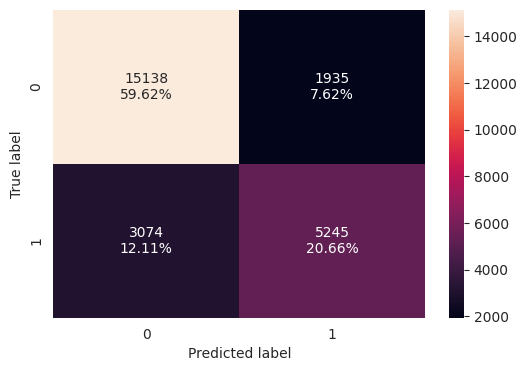

In [ ]:
plot_confusion_matrix(LogisticReg, x_train, y_train)

**Observations**

* The f1_score of the model is ~0.67 and we will try to maximize it further

* The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

###Checking Logistic Regression model performance on test set

In [ ]:
logistic_reg_perf_test = model_performance_classification(
    LogisticReg, x_test, y_test
)
logistic_reg_perf_test

Accuracy    Recall  Precision        F1
0  0.798677  0.618901   0.726226  0.668282

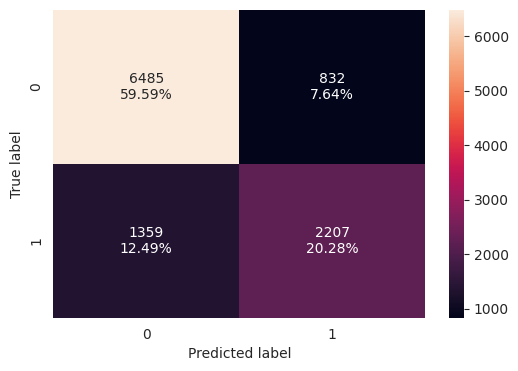

In [ ]:
plot_confusion_matrix(LogisticReg, x_test, y_test)

**Observations**

* The f1_score of the model is ~0.66 and we will try to maximize it further

* The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

#Naive - Bayes Classifier

In [ ]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

GaussianNB()

##Checking Naive - Bayes Classifier performance on training set

In [ ]:
nb_perf_train = model_performance_classification(
    nb_model, x_train_scaled, y_train
)
nb_perf_train

Accuracy    Recall  Precision        F1
0  0.408948  0.964659   0.352918  0.516775

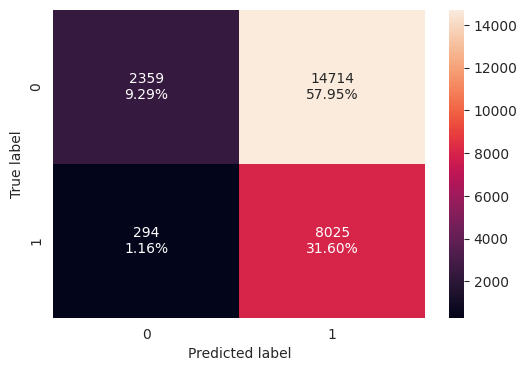

In [ ]:
plot_confusion_matrix(nb_model, x_train_scaled, y_train)

## Checking Naive - Bayes Classifer Perfromance on test set

In [ ]:
nb_perf_test = model_performance_classification(
    nb_model, x_test_scaled, y_test
)
nb_perf_test

Accuracy    Recall  Precision        F1
0  0.407516  0.964105   0.352326  0.516061

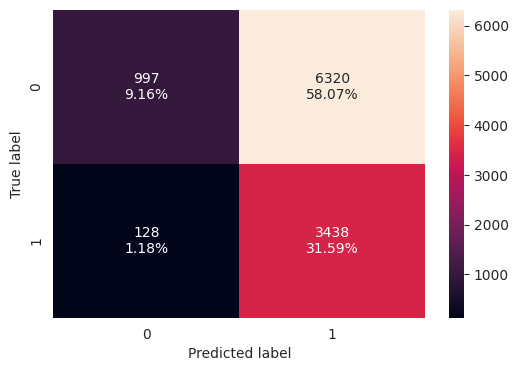

In [ ]:
plot_confusion_matrix(nb_model, x_test_scaled, y_test)

* The Naive Bayes model also performs poorly on both training and test sets

#KNN Classifier

###K=3


In [ ]:
#Build KNN Model
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

###Checking KNN classifier performance on training set

In [ ]:
knn_perf_train = model_performance_classification(
    knn_model, x_train_scaled, y_train
)
knn_perf_train

Accuracy    Recall  Precision        F1
0  0.915288  0.848299    0.88812  0.867753

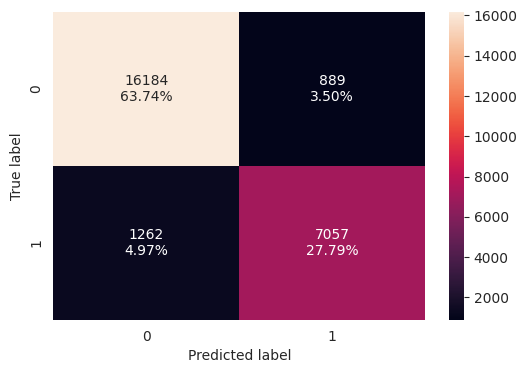

In [ ]:
plot_confusion_matrix(knn_model, x_train_scaled, y_train)

###Checking KNN Classifier performance on test set

In [ ]:
knn_perf_test = model_performance_classification(
    knn_model, x_test_scaled, y_test
)
knn_perf_test

Accuracy    Recall  Precision       F1
0  0.849582  0.745653   0.784597  0.76463

The KNN Classifier performs considerably better than the Logistic Regression and the Naive Bayes model.But there is a difference in train and test set, there is slightly overfitting.

In [ ]:
plot_confusion_matrix(knn_model, x_test_scaled, y_test)

#Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

###Checking Decision Tree Classifier performance on training set

In [ ]:
decision_tree_perf_train = model_performance_classification(
    dt_model, x_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision      F1
0   0.99362  0.983772   0.996712  0.9902

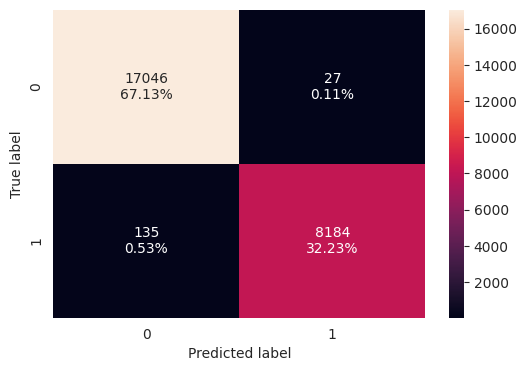

In [ ]:
plot_confusion_matrix(dt_model, x_train, y_train)

* Almost 0 errors on the training set, each sample has been classified correctly.
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* Let's check the performance on test data to see if the model is overfitting.

###Checking Decision Tree Classifier performance on test set

In [ ]:
decision_tree_perf_test = model_performance_classification(
    dt_model, x_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0   0.86217  0.786035   0.791808  0.788911

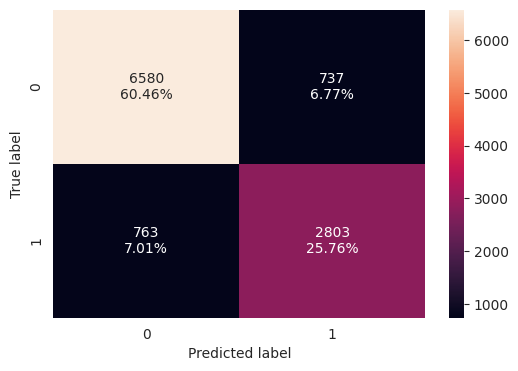

In [ ]:
plot_confusion_matrix(dt_model, x_test, y_test)

* The decision tree model is slightly overfitting the data as expected and not able to generalize well on the test set.
* We will have to prune the decision tree.

###Visualizing the decision tree

In [ ]:
feature_names = list(x.columns)
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(dt_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dt_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 177.92
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- t

* The tree is very huge difficult to understand, it should be pruned.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.383453
avg_price_per_room                    0.201134
market_segment_type_Online            0.093208
arrival_month                         0.080888
no_of_special_requests                0.071802
no_of_week_nights                     0.058307
no_of_weekend_nights                  0.041980
no_of_adults                          0.034337
room_type_reserved_Room_Type 4        0.010469
required_car_parking_space            0.007322
no_of_children                        0.006777
market_segment_type_Corporate         0.002232
room_type_reserved_Room_Type 2        0.002119
market_segment_type_Offline           0.001784
room_type_reserved_Room_Type 5        0.001673
room_type_reserved_Room_Type 6        0.001042
repeated_guest                        0.000706
room_type_reserved_Room_Type 7        0.000601
no_of_previous_cancellations          0.000071
market_segment_type_Complementary     0.000064
no_of_previou

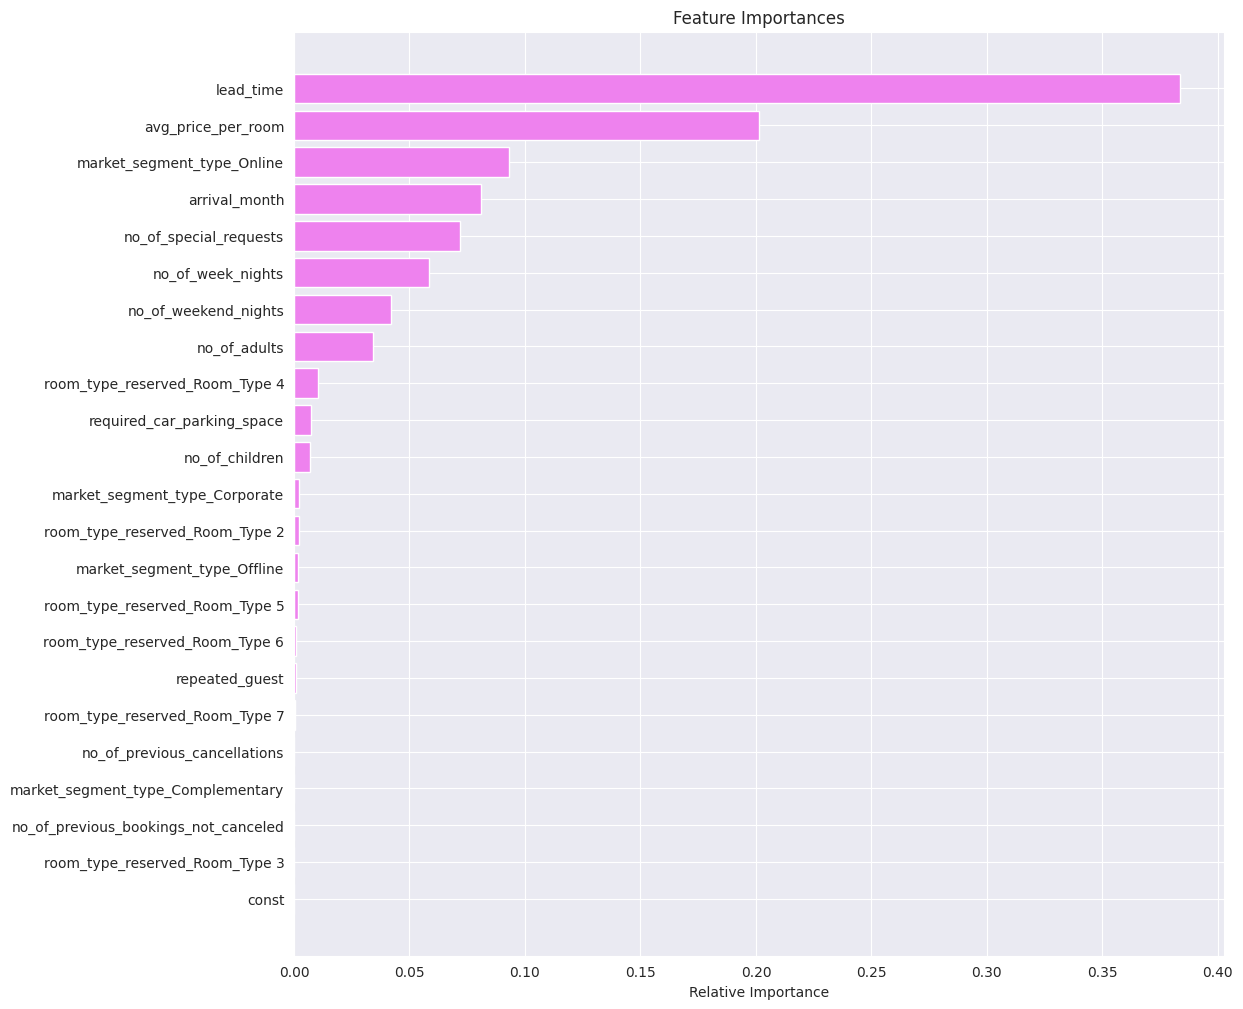

In [ ]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, lead time is the most important variable for predicting the booking status.

**The tree above is very complex, such a tree often overfits.**

#Model Performance Improvement

##Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold using ROC curve)

### Detecting and Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [ ]:
logistic_reg_perf_train = model_performance_classification(
    LogisticReg, x_train, y_train
)
logistic_reg_perf_train

Accuracy    Recall  Precision        F1
0  0.802733  0.630484   0.730501  0.676818

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   320.842937
no_of_adults                              1.333782
no_of_children                            1.989629
no_of_weekend_nights                      1.066715
no_of_week_nights                         1.092555
required_car_parking_space                1.033583
lead_time                                 1.201576
arrival_month                             1.051302
repeated_guest                            1.747960
no_of_previous_cancellations              1.321059
no_of_previous_bookings_not_canceled      1.565481
avg_price_per_room                        1.621750
no_of_special_requests                    1.243399
room_type_reserved_Room_Type 2            1.089239
room_type_reserved_Room_Type 3            1.003589
room_type_reserved_Room_Type 4            1.294399
room_type_reserved_Room_Type 5            1.030433
room_type_reserved_Room_Type 6            1.944078
room_type_reserved_Room_Type 7            1.074

* Some categorical levels of `market_segment` exhibit high multicollinearity

* We see that some variables have high VIF
  * The high VIF indicate perfect correlation between variables
* We will drop `market_segment_type_Online`.

**Removing `market_segment_type_Online `**

In [ ]:
x_train1 = x_train.drop(["market_segment_type_Online"], axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   39.870493
no_of_adults                             1.316744
no_of_children                           1.989007
no_of_weekend_nights                     1.066245
no_of_week_nights                        1.091866
required_car_parking_space               1.033504
lead_time                                1.199365
arrival_month                            1.051160
repeated_guest                           1.744651
no_of_previous_cancellations             1.320937
no_of_previous_bookings_not_canceled     1.565249
avg_price_per_room                       1.621602
no_of_special_requests                   1.239043
room_type_reserved_Room_Type 2           1.089099
room_type_reserved_Room_Type 3           1.003588
room_type_reserved_Room_Type 4           1.288317
room_type_reserved_Room_Type 5           1.030427
room_type_reserved_Room_Type 6           1.943839
room_type_reserved_Room_Type 7           1.074164
market_segment_

* Dropping market_segment_type_online fixed the multicollinearity in all column.

###Removing high p_value variables

**Dropping market_segment_type_Complementary**

In [ ]:
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(disp=False)
print("Training performance:")
model_performance_classification(lg1, x_train1, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.802654  0.630484   0.730298  0.676731

In [ ]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3266
Time:                        06:18:51   Log-Likelihood:                -10815.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.7792      0.108    -25.771      0.000      -2.991      -2.568
no_of_adults                             0.0588      

* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
* We are doing the dropping process manually by picking one variable at a time that has a high p-value, dropping it, and building a model again.

In [ ]:
x_train2=x_train1.drop(['market_segment_type_Complementary'],axis=1)

In [ ]:
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification(lg2, x_train2, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.801749  0.626277   0.730203  0.674259

* No significant change in the model performance.

In [ ]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3243
Time:                        06:18:52   Log-Likelihood:                -10851.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.8381      0.107    -26.425      0.000      -3.049      -2.628
no_of_adults                             0.0723      

**Dropping room_type_reserved_Room_Type 3**

In [ ]:
x_train3=x_train2.drop(['room_type_reserved_Room_Type 3'],axis=1)

In [ ]:
logit3 = sm.Logit(y_train, x_train3.astype(float))
lg3 = logit3.fit(disp=False)

print("Training performance:")
model_performance_classification(lg3, x_train3, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.801749  0.626277   0.730203  0.674259

* No significant change in the model performance.

In [ ]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3243
Time:                        06:18:52   Log-Likelihood:                -10851.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.8381      0.107    -26.428      0.000      -3.049      -2.628
no_of_adults                             0.0723      

**Dropping no_of_adults**

In [ ]:
x_train4=x_train3.drop(['no_of_adults'],axis=1)

In [ ]:
logit4 = sm.Logit(y_train, x_train4.astype(float))
lg4 = logit4.fit(disp=False)

print("Training performance:")
model_performance_classification(lg4, x_train4, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.801591  0.625676   0.730116  0.673874

* No significant change in the model performance.

In [ ]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3242
Time:                        06:18:53   Log-Likelihood:                -10853.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.7342      0.093    -29.358      0.000      -2.917      -2.552
no_of_children                           0.0868      

**Dropping no_of_children**

In [ ]:
x_train5=x_train4.drop('no_of_children',axis=1)

In [ ]:
logit5 = sm.Logit(y_train, x_train5.astype(float))
lg5 = logit5.fit(disp=False)

print("Training performance:")
model_performance_classification(lg5, x_train5, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.801276  0.625316   0.729491  0.673398

* No significant change in the model performance.

In [ ]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3241
Time:                        06:18:53   Log-Likelihood:                -10854.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -2.7440      0.093    -29.531      0.000      -2.926      -2.562
no_of_weekend_nights                     0.1517      

**Dropping no_of_previous_bookings_not_canceled**

In [ ]:
x_train6=x_train5.drop('no_of_previous_bookings_not_canceled',axis=1)

In [ ]:
logit6 = sm.Logit(y_train, x_train6.astype(float))
LogisticReg_tuned = logit6.fit(disp=False)

print("Training performance:")
model_performance_classification(LogisticReg_tuned, x_train6, y_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.801355  0.625556   0.729567  0.67357

* No significant change in the model performance.

In [ ]:
print(LogisticReg_tuned.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Fri, 17 Jan 2025   Pseudo R-squ.:                  0.3238
Time:                        06:18:53   Log-Likelihood:                -10859.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.7474      0.093    -29.561      0.000      -2.930      -2.565
no_of_weekend_nights               0.1516      0.020      7.708      0.

**Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *x_train6* as the final ones and *LogisticReg_tuned* as final model.**

###Test set performance

* We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
x_test6 = x_test[list(x_train6.columns)]

###Determining optimal threshold using ROC Curve

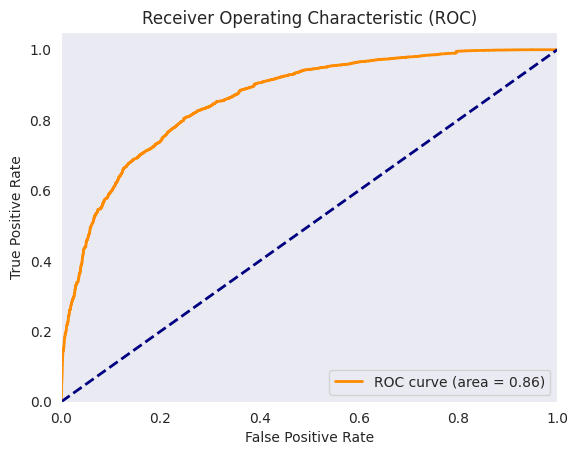

In [ ]:
y_pred = LogisticReg_tuned.predict(x_train6)
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Plot ROC curve
roc_auc = roc_auc_score(y_train, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [ ]:
# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_logit = round(thresholds[optimal_idx], 3)
print("\nOptimal Threshold: ", optimal_threshold_logit)


Optimal Threshold:  0.293


###Checking tuned Logistic Regression model performance on training set

In [ ]:
logistic_reg_tune_perf_train = model_performance_classification(
    LogisticReg_tuned, x_train6, y_train, optimal_threshold_logit
)
logistic_reg_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.770006  0.804904    0.61358  0.696339

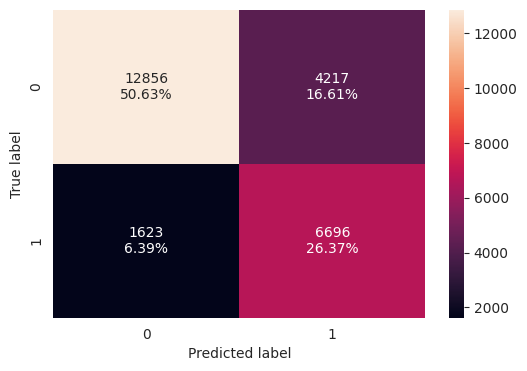

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, x_train6, y_train, optimal_threshold_logit)

###Checking tuned Logistic Regression model performance on test set

In [ ]:
logistic_reg_tune_perf_test = model_performance_classification(
    LogisticReg_tuned, x_test6, y_test, optimal_threshold_logit
)

logistic_reg_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.767527  0.802299   0.610542  0.693408

In [ ]:
plot_confusion_matrix(LogisticReg_tuned, x_test6, y_test, optimal_threshold_logit)

* The performance of the Logistic Regression model has improved considerably (on both training and test sets) by dropping variables with high p-values and setting an optimal threshold.

##KNN Classifier(different values of K)

###KNN Classifier performance improvement using different k values

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

* We'll only consider odd values of K as the classification will be done based on majority voting.

In [ ]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(x_train)
    y_pred_test = knn.predict(x_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

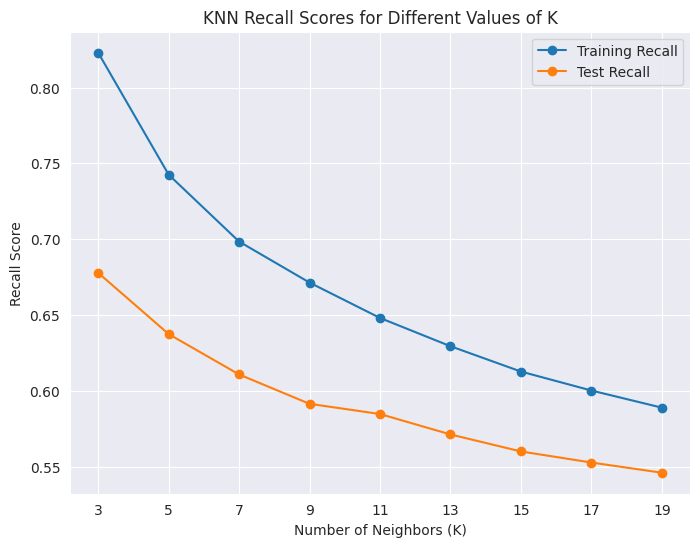

In [ ]:
# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Define the range for k values
k_values = range(2, 21)

# Initialize variables to store the best k and the highest recall score
best_k = 0
best_recall = 0

# Loop through each k value
for k in k_values:
    # Create and fit the KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)

    # Predict on the test set
    y_pred = knn.predict(x_test_scaled)

    # Calculate the recall score
    recall = recall_score(y_test, y_pred)

    # Print the recall score for the current k value
    print(f'Recall for k={k}: {recall}')

    # Update the best k and best recall score if the current recall is higher
    if recall > best_recall:
        best_recall = recall
        best_k = k

# Print the best k value and its recall score
print(f'\nThe best value of k is: {best_k} with a recall of: {best_recall}')

Recall for k=2: 0.6393718452047111
Recall for k=3: 0.7456533931575996
Recall for k=4: 0.6651710600112171
Recall for k=5: 0.7344363432417275
Recall for k=6: 0.6690970274817722
Recall for k=7: 0.7206954570947841
Recall for k=8: 0.6775098149186763
Recall for k=9: 0.713684800897364
Recall for k=10: 0.6713404374649468
Recall for k=11: 0.715086932136848
Recall for k=12: 0.673864273696018
Recall for k=13: 0.7030286034772855
Recall for k=14: 0.6747055524397083
Recall for k=15: 0.6999439147504206
Recall for k=16: 0.6721817162086371
Recall for k=17: 0.6906898485698262
Recall for k=18: 0.6693774537296691
Recall for k=19: 0.6864834548513741
Recall for k=20: 0.6640493550196298

The best value of k is: 3 with a recall of: 0.7456533931575996


In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors=best_k)
knn_tuned.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

###Checking tuned KNN model performance on training set

In [ ]:
knn_tuned_perf_train = model_performance_classification(
    knn_tuned, x_train_scaled, y_train
)
knn_tuned_perf_train

Accuracy    Recall  Precision        F1
0  0.915288  0.848299    0.88812  0.867753

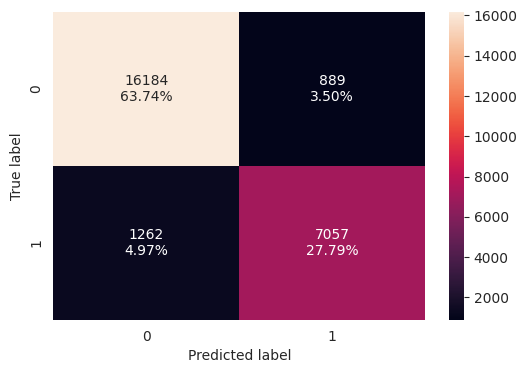

In [ ]:
plot_confusion_matrix(knn_tuned, x_train_scaled, y_train)

###Checking tuned KNN model performance on test set

In [ ]:
knn_tuned_perf_test = model_performance_classification(
    knn_tuned, x_test_scaled, y_test
)
knn_tuned_perf_test

Accuracy    Recall  Precision       F1
0  0.849582  0.745653   0.784597  0.76463

In [ ]:
plot_confusion_matrix(knn_tuned, x_test_scaled, y_test)

* The value of k is the same (k = 3) as the base model. So the model performance remains unaltered on both training and test sets.

##Decision Tree Classifier (pre-pruning and post-pruning)

###Reducing over fitting

###Pre - pruning the tree

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [ ]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(x_train, y_train))
print("Accuracy on test set : ",dTree1.score(x_test, y_test))

Accuracy on training set :  0.7852867044738501
Accuracy on test set :  0.7886612147385831


* Now the model is not overfitting and we have a generalized model.

### Visualizing the decision tree

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4566.00, 792.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2520.00, 2740.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [5648.00, 1018.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2955.00, 144.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [681.00, 1280.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [590.00, 233.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [46.00, 2094.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [67.00, 18.00] class: 0



* The tree has become readable now

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.505810
market_segment_type_Online            0.190916
no_of_special_requests                0.173238
avg_price_per_room                    0.105201
arrival_month                         0.024834
no_of_week_nights                     0.000000
room_type_reserved_Room_Type 3        0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 2        0.000000
required_car_parking_space            0.000000
no_of_children                        0.000000
no_of_adults                          0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_gues

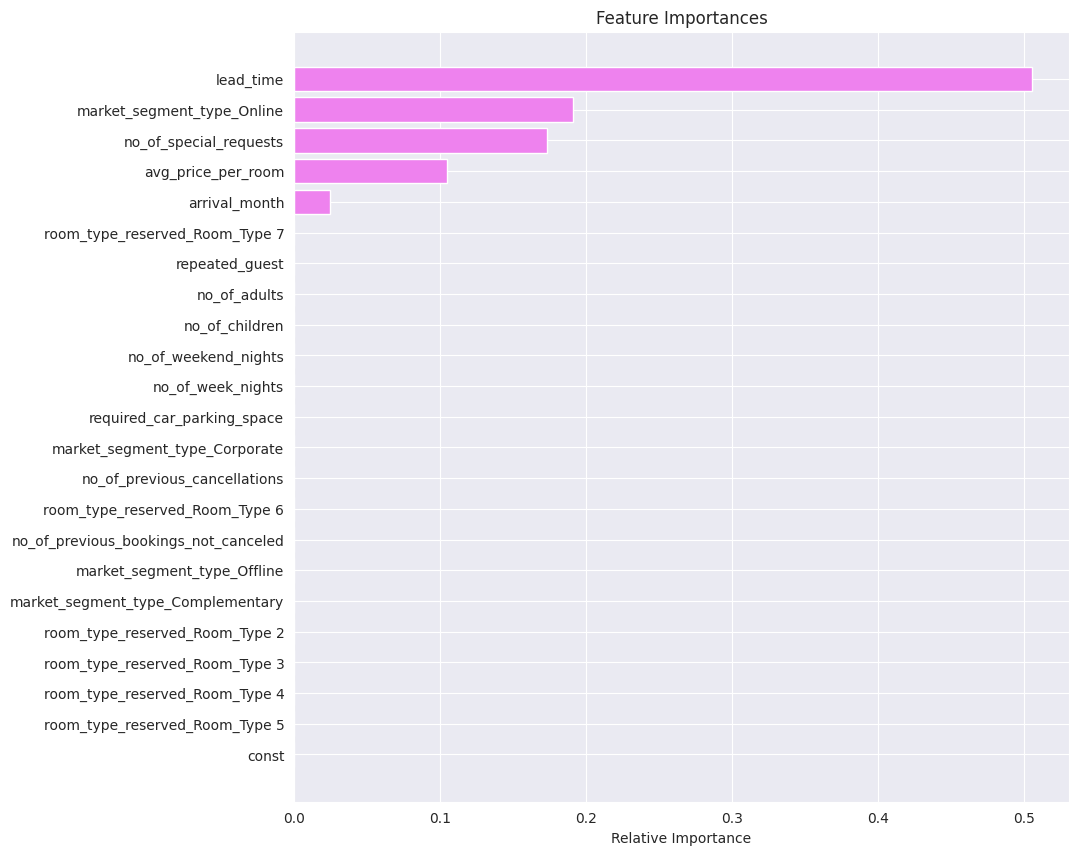

In [ ]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* You can see in important features of previous model and here lead time on top.

* That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough

* It is bad to have a very low depth because your model will underfit

* Let's see how to find the best values

### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
# Choose the type of classifier.
dt_model_tuned_1 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {"class_weight": [None, "balanced"],
    'max_depth': np.arange(1,10),
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dt_model_tuned_1, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dt_model_tuned_1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dt_model_tuned_1.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, random_state=1)

In [ ]:
dt_model_tuned_1_perf_train = model_performance_classification(
    dt_model_tuned_1, x_train, y_train
)
dt_model_tuned_1_perf_train

Accuracy   Recall  Precision        F1
0  0.620668  0.86032   0.457989  0.597762

In [ ]:
dt_model_tuned_1_perf_test = model_performance_classification(
    dt_model_tuned_1, x_test, y_test
)
dt_model_tuned_1_perf_test

Accuracy    Recall  Precision        F1
0  0.613434  0.853337   0.452356  0.591276

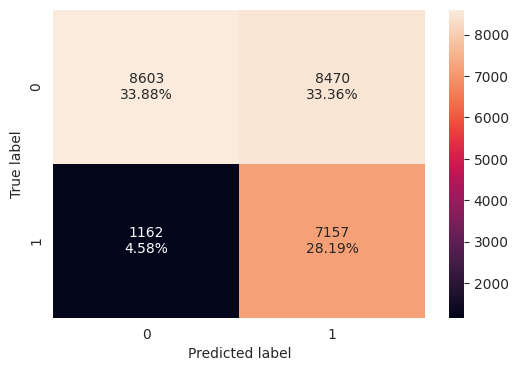

In [ ]:
plot_confusion_matrix(dt_model_tuned_1, x_train, y_train)

* After tuning hyperparameters, the performance of the model has become more generalised.

###Visualizing the Decision Tree

In [ ]:
feature_names=list(x_train.columns)

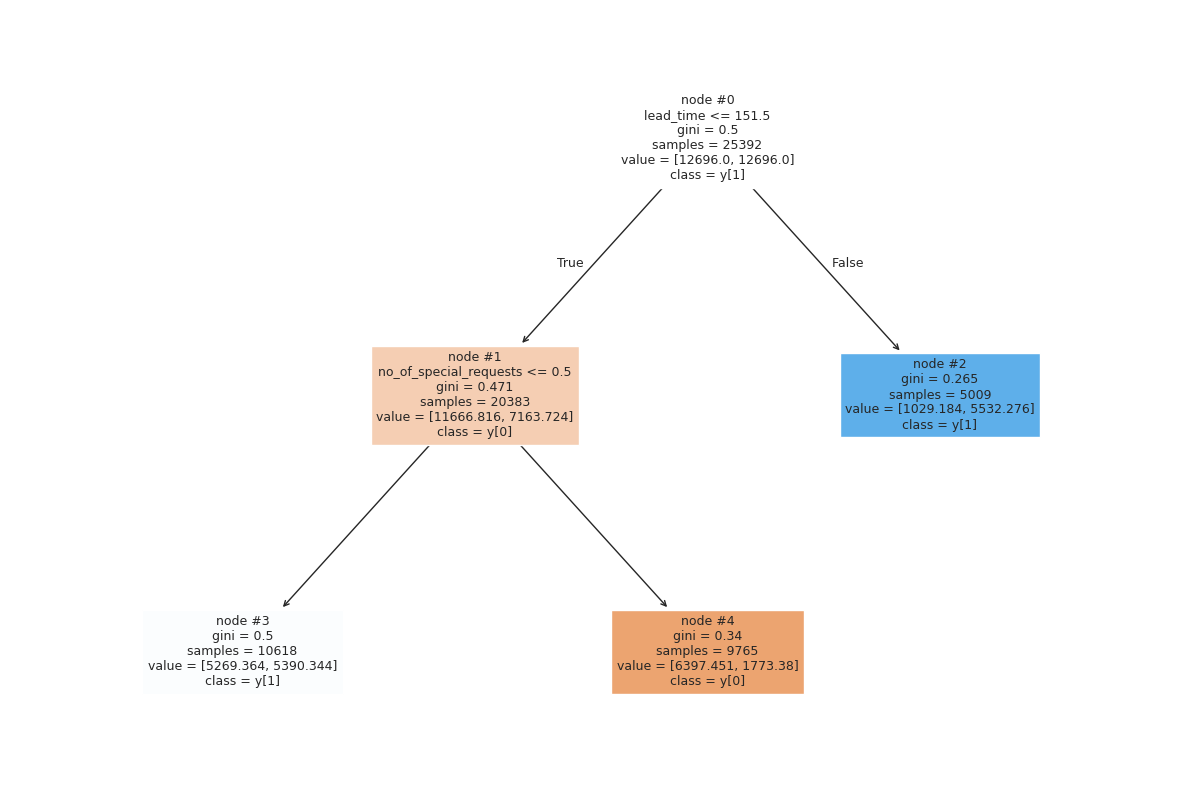

In [ ]:
plt.figure(figsize=(15,10))

tree.plot_tree(dt_model_tuned_1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dt_model_tuned_1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5269.36, 5390.34] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6397.45, 1773.38] class: 0
|--- lead_time >  151.50
|   |--- weights: [1029.18, 5532.28] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )
print (pd.DataFrame(dt_model_tuned_1.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))
#Here we will see that importance of features has increased

                                           Imp
lead_time                             0.729993
no_of_special_requests                0.270007
const                                 0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
avg_price_per_room                    0.000000
no_of_adults                          0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_month                         0.000000
required_car_parking_space            0.000000
no_of_week_nights                     0.000000
no_of_weekend

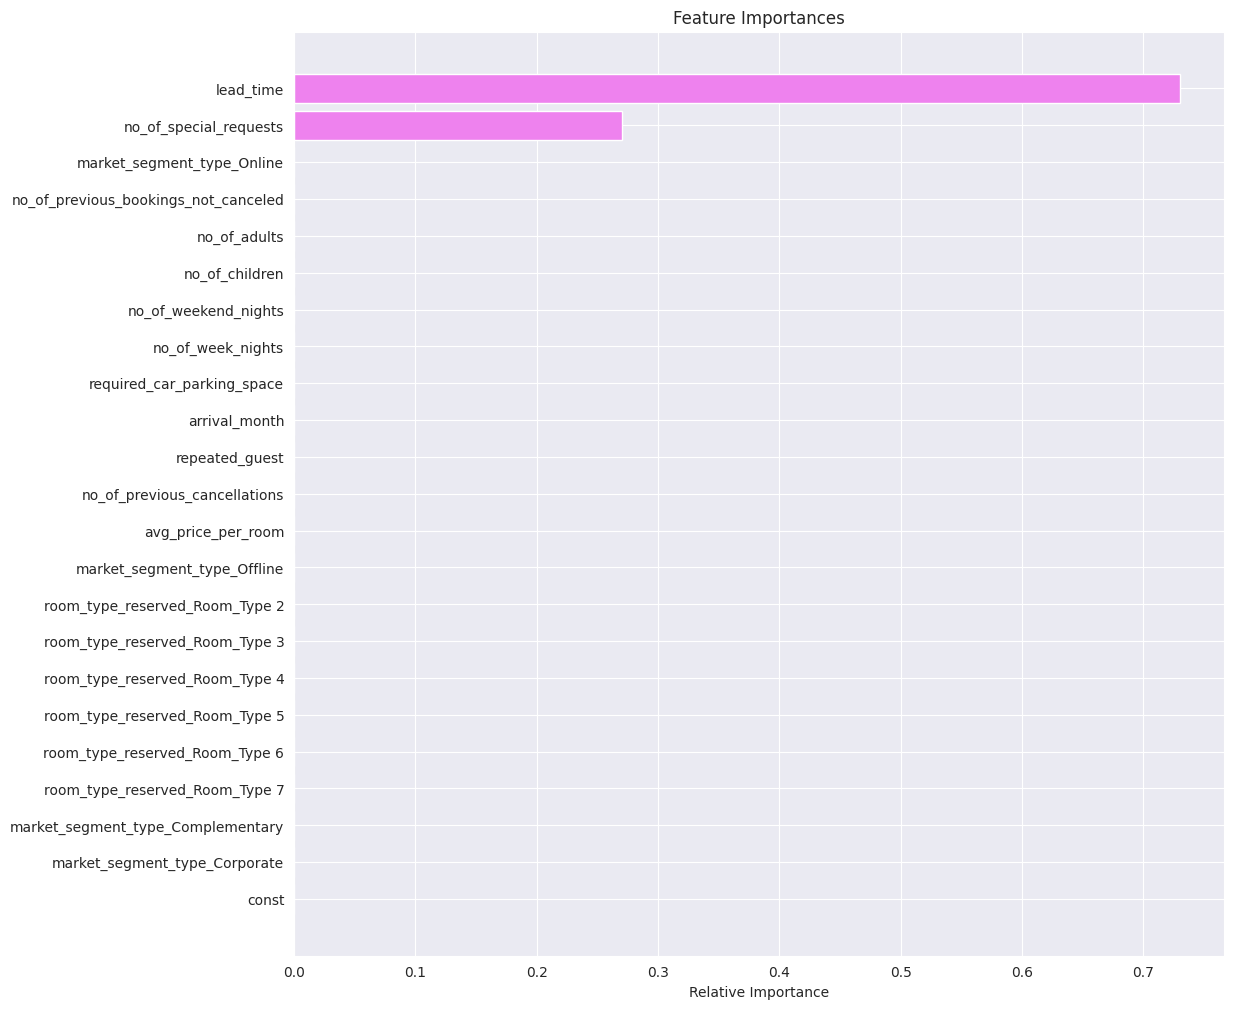

In [ ]:
importances = dt_model_tuned_1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* We can see in important features of previous model,Lead time was on the top and here lead time is on the top.

* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

##Post pruning

###Cost complexity pruning

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

###Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
clf = DecisionTreeClassifier(random_state=1,class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities =abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.009302
1     0.000000e+00    0.009302
2     2.926260e-20    0.009302
3     2.926260e-20    0.009302
4     2.926260e-20    0.009302
...            ...         ...
1754  9.074926e-03    0.327908
1755  9.408290e-03    0.337317
1756  1.253153e-02    0.349848
1757  3.404623e-02    0.417941
1758  8.205938e-02    0.500000

[1759 rows x 2 columns]

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight="balanced")
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08205938055988715


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

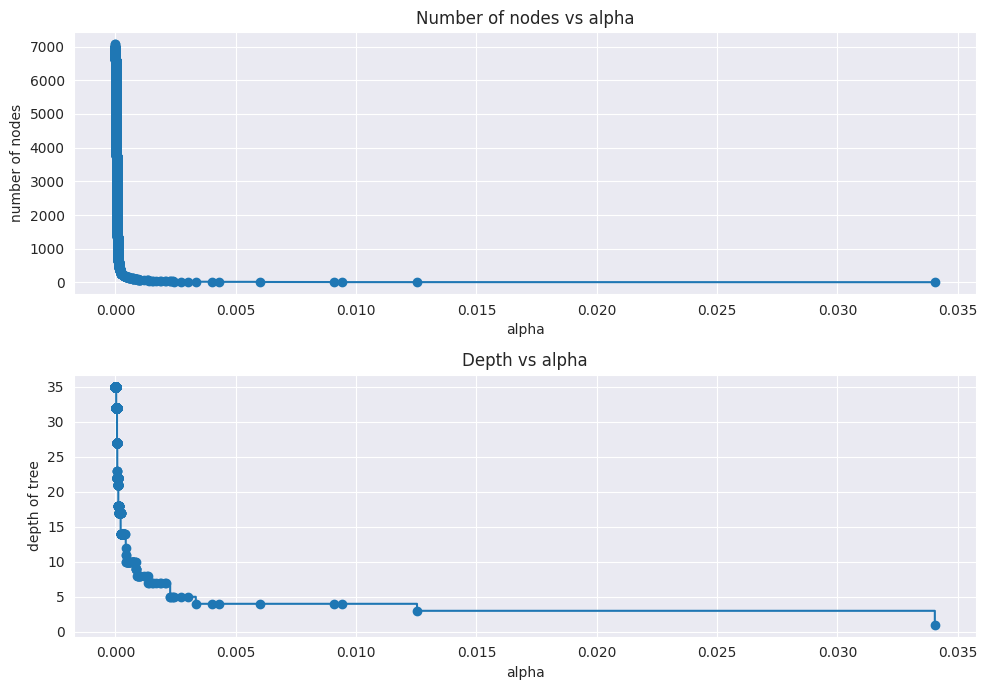

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

###Accuracy vs alpha for training and testing sets

As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better.

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

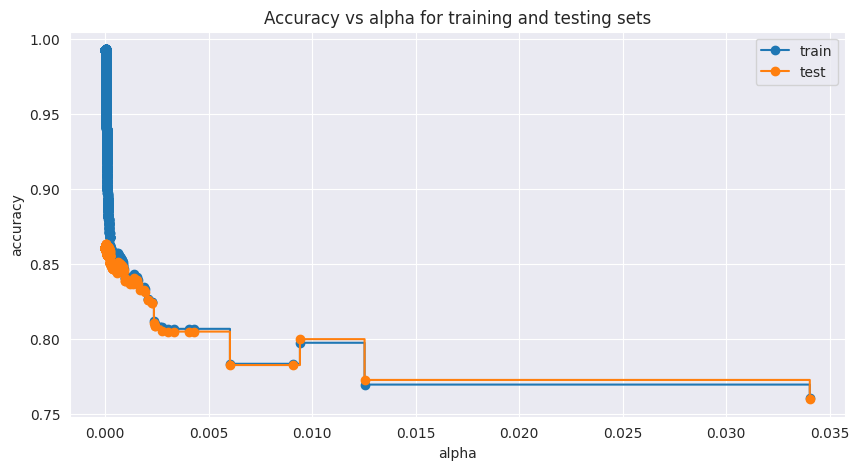

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(x_train, y_train))
print('Test accuracy of best model: ',best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=3.767170318602921e-05, class_weight='balanced',
                       random_state=1)
Training accuracy of best model:  0.9760160680529301
Test accuracy of best model:  0.862813562436828


The tree overfits, leading to a 97% training accuracy and 86% testing accuracy.

#### Since accuracy isn't the right metric for our data we would want high recall

In [ ]:
from sklearn import metrics
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(x_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [ ]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(x_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

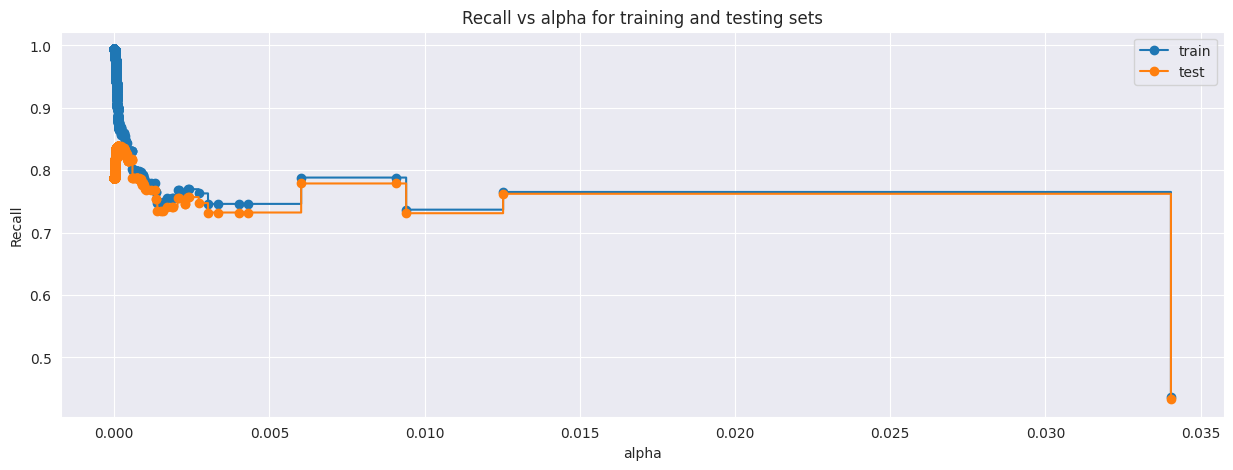

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012201569741511205,
                       class_weight='balanced', random_state=1)


In [ ]:
dt_model_tuned_2_perf_train = model_performance_classification(
    best_model, x_train, y_train
)
dt_model_tuned_1_perf_train

Accuracy   Recall  Precision        F1
0  0.620668  0.86032   0.457989  0.597762

In [ ]:
dt_model_tuned_2_perf_test = model_performance_classification(
    best_model, x_test, y_test
)
dt_model_tuned_1_perf_train

Accuracy   Recall  Precision        F1
0  0.620668  0.86032   0.457989  0.597762

### Confusion Matrix - post-pruned decision tree

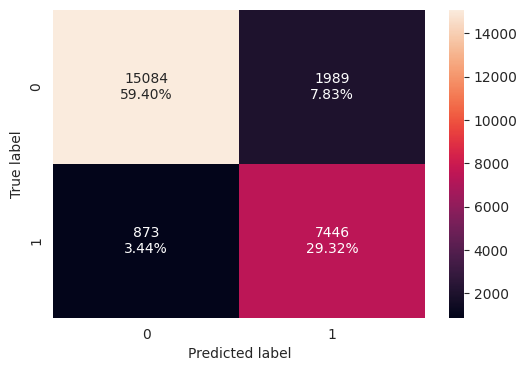

In [ ]:
plot_confusion_matrix(best_model, x_train, y_train)

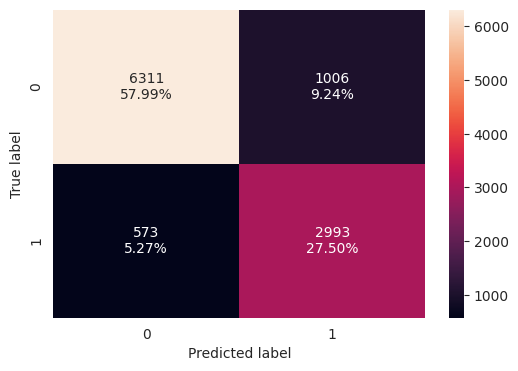

In [ ]:
plot_confusion_matrix(best_model, x_test, y_test)

In [ ]:
# Recall on train and test
print(model_performance_classification(best_model,x_test,y_test))
print(model_performance_classification(best_model,x_train,y_train))

   Accuracy    Recall  Precision        F1
0  0.854911  0.839316   0.748437  0.791276
   Accuracy   Recall  Precision        F1
0  0.887287  0.89506   0.789189  0.838797


* With post-pruning we get the highest recall on both training and test set

###Visualizing the decision tree

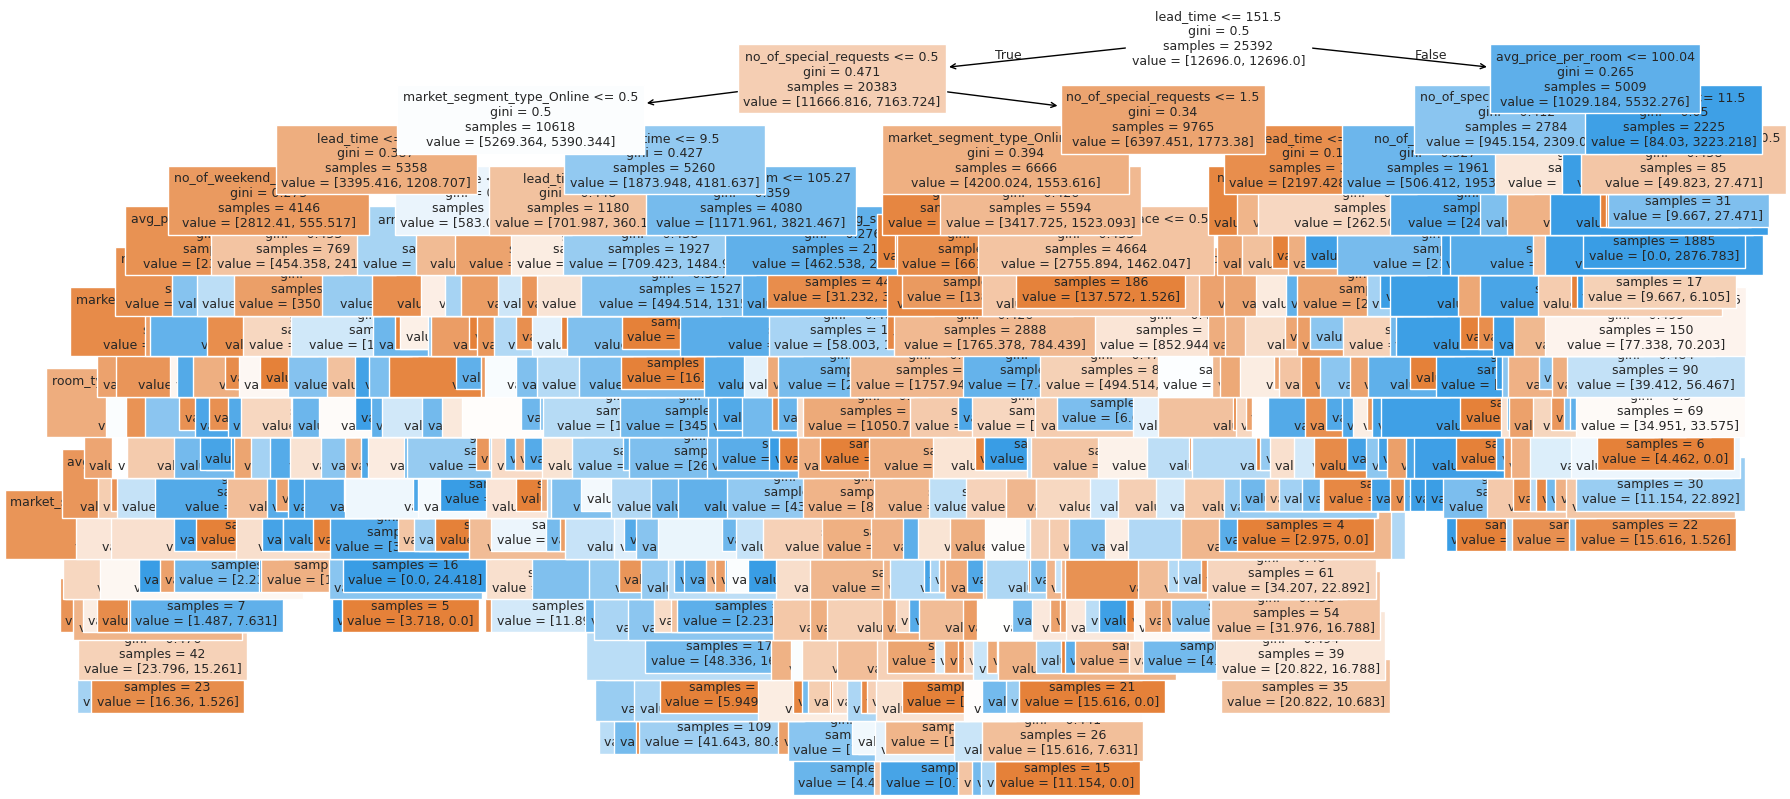

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 177.92
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- lead_time >  16.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- arrival_month <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- we

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = x_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.417255
market_segment_type_Online            0.143005
no_of_special_requests                0.133003
avg_price_per_room                    0.122481
arrival_month                         0.074555
no_of_adults                          0.029953
no_of_weekend_nights                  0.029238
no_of_week_nights                     0.022267
required_car_parking_space            0.010439
room_type_reserved_Room_Type 4        0.004716
market_segment_type_Offline           0.004584
market_segment_type_Corporate         0.002019
repeated_guest                        0.001674
no_of_children                        0.001614
room_type_reserved_Room_Type 5        0.000981
room_type_reserved_Room_Type 2        0.000945
room_type_reserved_Room_Type 6        0.000633
room_type_reserved_Room_Type 7        0.000418
market_segment_type_Complementary     0.000221
room_type_reserved_Room_Type 3        0.000000
no_of_previou

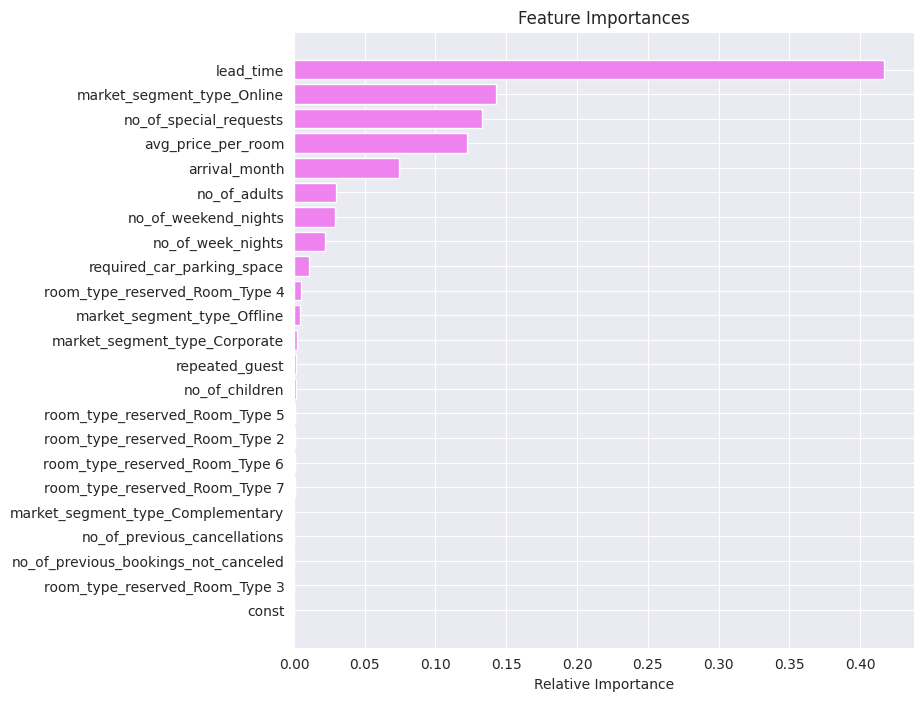

In [ ]:
# importance of features in the tree building

importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Lead time and market segment type online of loan are the most important features.

#Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        logistic_reg_tune_perf_train.T,
        nb_perf_train.T,
        knn_perf_train.T,
        knn_tuned_perf_train.T,
        decision_tree_perf_train.T,
        dt_model_tuned_1_perf_train.T,
        dt_model_tuned_2_perf_train.T
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Improved",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression Base  Logistic Regression Improved  \
Accuracy                   0.802733                      0.770006   
Recall                     0.630484                      0.804904   
Precision                  0.730501                      0.613580   
F1                         0.676818                      0.696339   

           Naive Bayes Base  KNN Base  KNN Tuned  Decision Tree Base  \
Accuracy           0.408948  0.915288   0.915288            0.993620   
Recall             0.964659  0.848299   0.848299            0.983772   
Precision          0.352918  0.888120   0.888120            0.996712   
F1                 0.516775  0.867753   0.867753            0.990200   

           Decision Tree Pre-Pruned  Decision Tree Post-Pruned  
Accuracy                   0.620668                   0.887287  
Recall                     0.860320                   0.895060  
Precision                  0.457989                   0.789189  
F1                         0.597762                   0.838797

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        logistic_reg_tune_perf_test.T,
        nb_perf_test.T,
        knn_perf_test.T,
        knn_tuned_perf_test.T,
        decision_tree_perf_test.T,
        dt_model_tuned_1_perf_test.T,
        dt_model_tuned_2_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Logistic Regression Tuned",
    "Naive Bayes Base",
    "KNN Base",
    "KNN Tuned",
    "Decision Tree Base",
    "Decision Tree Pre-Pruned",
    "Decision Tree Post-Pruned"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression Base  Logistic Regression Tuned  \
Accuracy                   0.798677                   0.767527   
Recall                     0.618901                   0.802299   
Precision                  0.726226                   0.610542   
F1                         0.668282                   0.693408   

           Naive Bayes Base  KNN Base  KNN Tuned  Decision Tree Base  \
Accuracy           0.407516  0.849582   0.849582            0.862170   
Recall             0.964105  0.745653   0.745653            0.786035   
Precision          0.352326  0.784597   0.784597            0.791808   
F1                 0.516061  0.764630   0.764630            0.788911   

           Decision Tree Pre-Pruned  Decision Tree Post-Pruned  
Accuracy                   0.613434                   0.854911  
Recall                     0.853337                   0.839316  
Precision                  0.452356                   0.748437  
F1                         0.591276                   0.791276

**Observations**

* Logistic Regression tuned is much better than logistic regression base
* Naive bayes base is not overfitting but not performing well.
* KNN base is overfitting, performing well on train data and not performing well on test data. KNN tuned also is not performing well on test data.
* Decision tree model with default parameters is overfitting the training data and is not able to generalize well.
* Post pruned tree has performing well on train and test on accuracy, recall, precision, F1.
* But pre-pruned tree has performing well on recall compared to post pruned,Pre-pruned tree has given a generalized performance with the recall score of 0.86 and 0.85 on training and test set, respectively.
* The company can predict the interested leads better using the pre-pruned tree.

#Actionable Insights and Recommendations

##Actionable Insights

**Target the right segment:** The campaign should target customers online, where the highest bookings are made even after getting highest price on booking but the cancelation is also high in online segment.Corporate has less number of bookings and near to zero cancelation.

**Target the right month:** OCTOBER, SEPTEMBER, AUGUST are month with highest bookings.

**Target the repeated customers:** Those are repeated customers tend to cancel less.

**Number of special request:** As the special request increases the cancelation decreases.

**required parking space:** Those who require a parking space are tend to cancel less.

**Number of previous cancelation:** Number of previous cancelation affect the cancelation.

##Recommendations



**Feature Engineering:** Explore creating new features based on existing ones.

**Focus on the most promising customer segments:** Concentrate marketing efforts on customers with a higher special requests, repeatative customers.

**Refine customer understanding:** Dig deeper into customer behavior and preferences. This can help tailor marketing messages and product offerings for maximum impact.

**Test and iterate:** Continuously evaluate the model's performance and make adjustments as needed. Experiment with different targeting strategies and messaging to optimize results.

**Invest in data quality:** Ensure the data used to build the model is accurate, complete, and up-to-date. High-quality data will lead to more reliable predictions.